<a href="https://colab.research.google.com/github/kushal-h/AI-Textbook/blob/master/stage1/Analysing_the_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir

###Reading MDER dataset

In [ ]:
#@title
acl_df = pd.read_excel('/content/ACL.xlsx', header = None)

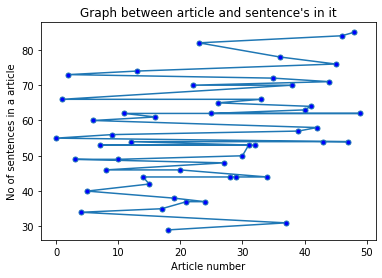

In [ ]:
#@title
plt.plot(acl_df[0].value_counts(), marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Article number')

plt.ylabel('No of sentences in a article')
plt.title("Graph between article and sentence's in it")

plt.show()

###Plotting relation graph between article's and each sentence's in it

In [ ]:
#@title
import plotly.express as px
fig = px.line( acl_df[0].value_counts(),
               markers = True )
fig.update_layout(title="Graph between article and sentence's in it",
                   xaxis_title='Article number',
                   yaxis_title='No of sentences in a article')
fig.show()

###Installing and importing spacy english large model

In [ ]:
#@title
!python -m spacy download en_core_web_lg
import spacy



###Loading spacy english large model

In [ ]:
#@title
nlp = spacy.load("en_core_web_lg")

###Extracting entities form sentences

In [ ]:
#@title
ent_lst = []
def get_entities(row):

  text = row[2]

  doc = nlp(str(text))


  for ent in doc.ents:
    ent_lst.append( ent.text)

acl_df.apply(lambda row: get_entities(row), axis= 1)

0       None
1       None
2       None
3       None
4       None
        ... 
2795    None
2796    None
2797    None
2798    None
2799    None
Length: 2800, dtype: object

In [ ]:
#@title
ent_lst

['three',
 'first',
 '2015',
 'English',
 'Xu et al',
 '1 million',
 '0:5 million',
 'three',
 '1:1',
 '1:9',
 'second',
 '2017',
 'multiturn',
 'Chinese',
 '1 million',
 '50 thousand',
 '6',
 '670',
 '10',
 '2018b',
 'China',
 '1 million',
 '10 thousand',
 '1:1',
 '1:9',
 'Zhang et al.',
 '2018b',
 'IoI',
 'Matching~',
 '~RNN~',
 'Lowe et al.',
 '2015',
 'Lowe et al.',
 '2015',
 '2015',
 'Kadlec et al.',
 '2015',
 'Wan et al.',
 '2016',
 'Wang',
 'Jiang',
 '2016',
 'Zhou et al.',
 '2016',
 '~DL2R~',
 'Yan et al.',
 '2016',
 '~RNN~',
 'Wu et al.',
 '2017',
 'Zhang et al.',
 '2018b',
 'Zhou et al.',
 '2018b',
 'Zhou et al',
 '2018b',
 'Zhang et al',
 '2018b',
 'code4',
 '200',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '32',
 'first',
 '16',
 'second',
 '200',
 'zero',
 'L',
 '7',
 '0:2',
 '50',
 '0:0005',
 '1',
 'Table 2',
 'three',
 '17',
 '18',
 'IoIlocal',
 '0:05',
 'three',
 '1',
 '2',
 '3',
 'IoI',
 '2',
 'IoI',
 'three',
 'three',
 'first',
 '1',
 'IoI',
 '7',
 '1',
 'two',
 'three',
 

In [ ]:
#@title
len(ent_lst)

4094

In [ ]:
#@title
len(set(ent_lst))

1544

###Unzipping SemEval's dataset

In [ ]:
#@title
!unzip /content/training-set.zip

unzip:  cannot find or open /content/training-set.zip, /content/training-set.zip.zip or /content/training-set.zip.ZIP.


In [ ]:
#@title
t = 'I am going to Home the oksoks'

In [ ]:
#@title
import re
tt = re.findall(r'(\w+\s+){4}', t)
tt = re.sub("\s+", "", tt[0])

In [ ]:
#@title
tt

'to'

###configuring the SemEval dir path

In [ ]:
#@title
directory_root = '/content/training-set'
root_dir = listdir(directory_root)

FileNotFoundError: ignored

###Navigating to data directory

In [ ]:
#@title
def nav_dir(root_dir, entities = False, sentence = False, stan = False):
  sent_dir_lst = []
  ent_dir_lst = []
  stn_dir_lst = []
  for tsk_nme in root_dir:
    if tsk_nme == 'README.md' :
      root_dir.remove(tsk_nme)
    elif tsk_nme == 'desktop.ini' :
      root_dir.remove(tsk_nme)
    else:
      tsk_dir = listdir(f"{directory_root}/{tsk_nme}/")

      for atcl_indx in tsk_dir:
        if entities:
          ent_atcl_indx_dir = f"{directory_root}/{tsk_nme}/{atcl_indx}/{'entities.txt'}"
          ent_dir_lst.append(ent_atcl_indx_dir)
        elif sentence:
          sent_atcl_indx_dir = f"{directory_root}/{tsk_nme}/{atcl_indx}/{'sentence.txt'}"
          sent_dir_lst.append(sent_atcl_indx_dir)
        elif stan:
          for stan_fle_nme in listdir(f"{directory_root}/{tsk_nme}/{atcl_indx}"):
            if stan_fle_nme.endswith('Stanza-out.txt'):
              stan_fle_nme_stor = f"{directory_root}/{tsk_nme}/{atcl_indx}/{stan_fle_nme}"
              stn_dir_lst.append(stan_fle_nme_stor)
  if sentence:
    return sent_dir_lst
  elif entities:
    return ent_dir_lst
  elif stan:
    return stn_dir_lst

###Plotting relation graph between article's and each sentence's in it

In [ ]:
#@title
stan_dir_lst = nav_dir(root_dir, stan= True)
total_sentence_lst = []
for each_senetece in stan_dir_lst:
  with open(each_senetece) as f:
    doc = nlp(f.read())
    sentences = [str(sent).strip() for sent in doc.sents]
    total_sentence_lst.append(len(sentences))
fig = px.line( total_sentence_lst,
               markers = True )
fig.update_layout(title="Graph between article and sentence's in it",
                   xaxis_title='Article number',
                   yaxis_title='No of sentences in a article')
fig.show()

###Extracting entities from SemEval dataset

In [ ]:
#@title
semeval_ent = nav_dir(root_dir, entities= True)

print(len(semeval_ent)) #Entities file

In [ ]:
#@title
semeval_ent_lst = []
for ent_file_path in total_sentence_lst:
  with open(ent_file_path) as f:
    for line in f.readlines():

      semeval_ent_lst.append(line.split('\t')[3].strip('\n'))

In [ ]:
#@title
semeval_ent_lst

#####Total entities and total unique entities

In [ ]:
#@title
print(len(semeval_ent_lst))
print(len(set(semeval_ent_lst)))

In [ ]:
#@title
from matplotlib_venn import venn2, venn3
plt.figure(figsize=(25,6))
venn2([set(ent_lst), set(semeval_ent_lst)], set_labels = ('MDER', 'SemEval') , alpha=.65 )
plt.title('Entities Compression ')
plt.show()

Required task

In [ ]:
#@title
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_excel('/content/Y_Datasets.xlsx', header = None)
df2 = pd.read_excel('/content/Y_Methods.xlsx', header = None)

In [ ]:
#@title
df1

In [ ]:
#@title
df2

In [ ]:
#@title
df = pd.concat([df1, df2])
df

In [ ]:
#@title
character_dataset = df1[0].str.len()
character_dataset.name = "count"


In [ ]:
#@title
character_dataset = character_dataset.to_frame()

In [ ]:
#@title
words_dataset = df1[0].str.split().str.len()
words_dataset.name = "count"
words_dataset = words_dataset.to_frame()

In [ ]:
#@title
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=100)
plt.bar(character.index, height = character["count"], width = 1)
plt.xlabel("Entities")
plt.ylabel("characters")
plt.title("Entity VS Character")

plt.show()

In [ ]:
#@title
words

In [ ]:
#@title
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=100)
plt.bar(character.index, height = words["count"], width = 1)
plt.xlabel("Entities")
plt.ylabel("Words")
plt.title("Entity VS Words")

plt.show()

In [ ]:
#@title
character.hist( bins=25,  figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [ ]:
#@title
import plotly.express as px

fig = px.histogram(character, x=character["count"], y = character.index)
fig.show()

In [ ]:
#@title
import plotly.express as px

fig = px.histogram(words, x=words["count"], y = words.index)
fig.show()

In [ ]:
#@title
count.hist(bins=3)

In [ ]:
#@title
len(df.values[0])

In [ ]:
#@title
import json

In [ ]:
#@title
with open("/content/dataset.json", "r") as f:
  data = json.load(f)

In [ ]:
#@title
!pip install nested_lookup

In [ ]:
#@title
from nested_lookup import nested_lookup
li = nested_lookup('from sentence', data)

In [ ]:
#@title
len(li)

In [ ]:
#@title
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=100)
plt.bar(count.index, height = count["character"], width = 1)
plt.xlabel("Entities")
plt.ylabel("characters")
plt.title("Entity VS Character")

plt.show()

In [ ]:
ax.bar(x1, data1, width=0.4, color='none', edgecolor='blue', linewidth=2)
ax.bar(x2 + 0.4, data2, width=0.4, color='none', edgecolor='red', linewidth=2)


In [ ]:
#@title
import re
pat = r'.*?\~(.*)~.*'             #See Note at the bottom of the answer
s = "foobar~'infoNeededHere'~ddd"
match = re.search(pat, s)

In [ ]:
#@title
 match.group(1)

In [ ]:
#@title
re.findall(pat, s)

In [ ]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

In [ ]:
x

array([-10.   ,  -9.999,  -9.998, ...,   9.997,   9.998,   9.999])

In [ ]:
p

array([7.43359757e-07, 7.45220389e-07, 7.47085490e-07, ...,
       7.48955072e-07, 7.47085490e-07, 7.45220389e-07])

# Analysing Hou's and Paper With Code Datasets (Method and Dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Paper With Code's Dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn3
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import plotly.express as px
import math
from scipy.stats import f_oneway

pwc_method_df = pd.read_json('/content/drive/MyDrive/jian_wu/paper_with_code/methods.json')

pwc_dataset_df = pd.read_json('/content/drive/MyDrive/jian_wu/paper_with_code/datasets.json')

#### Cleaning Method entity

In [ ]:
pwc_method_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   url               1985 non-null   object
 1   name              1985 non-null   object
 2   full_name         1983 non-null   object
 3   description       1985 non-null   object
 4   paper             1802 non-null   object
 5   introduced_year   1985 non-null   int64 
 6   source_url        1802 non-null   object
 7   source_title      1802 non-null   object
 8   code_snippet_url  1210 non-null   object
 9   num_papers        1985 non-null   int64 
 10  collections       1985 non-null   object
dtypes: int64(2), object(9)
memory usage: 170.7+ KB


In [ ]:
pwc_method_df['full_name'].replace('', np.nan, inplace=True)
# pwc_method_df

In [ ]:
pwc_method_df['method_name'] = pwc_method_df['full_name'].fillna(pwc_method_df['name'])

In [ ]:
pwc_method_df['method_name'].describe()

count                1985
unique               1979
top       Capsule Network
freq                    2
Name: method_name, dtype: object

In [ ]:
pwc_method_df.drop_duplicates(subset = 'method_name', inplace = True)
pwc_method_df['method_name'].describe()

count            1979
unique           1979
top       Fire Module
freq                1
Name: method_name, dtype: object

#### Creating character and word count for Method entity

In [ ]:
count_pwc_method = pd.DataFrame()
count_pwc_method['character'] = pwc_method_df['method_name'].str.len()
count_pwc_method['word'] = pwc_method_df['method_name'].str.split().str.len()
count_pwc_method['Capital'] = pwc_method_df['method_name'].str.findall(r'[A-Z]').str.len()


In [ ]:
count_pwc_method

,character,word,Capital
0,11,2,2
1,8,1,2
2,21,1,4
3,31,3,3
4,24,2,3
...,...,...,...
1980,20,3,3
1981,10,1,2
1982,20,3,3
1983,15,2,2


#### Cleaning Dataset entity

In [ ]:
pwc_dataset_df['full_name'].replace('', np.nan, inplace=True)
# pwc_dataset_df

In [ ]:
pwc_dataset_df['dataset_name'] = pwc_dataset_df['full_name'].fillna(pwc_dataset_df['name'])
# pwc_dataset_df

In [ ]:
pwc_dataset_df['dataset_name'].describe()

count               7012
unique              6967
top       datacluster.ai
freq                  16
Name: dataset_name, dtype: object

In [ ]:
pwc_dataset_df.drop_duplicates(subset = 'dataset_name', inplace = True)
pwc_dataset_df['dataset_name'].describe()

count      6967
unique     6967
top       MNIST
freq          1
Name: dataset_name, dtype: object

In [ ]:
pwc_dataset_df['dataset_name'].isnull().sum()

0

#### Creating character and word count for Dataset entity

In [ ]:
count_pwc_dataset = pd.DataFrame()
count_pwc_dataset['character'] = pwc_dataset_df['dataset_name'].str.len()
count_pwc_dataset['word'] = pwc_dataset_df['dataset_name'].str.split().str.len()
count_pwc_dataset['Capital'] = pwc_dataset_df['dataset_name'].str.findall(r'[A-Z]').str.len()
count_pwc_dataset

,character,word,Capital
0,5,1,5
1,29,3,4
2,8,1,4
3,51,5,4
4,38,4,5
...,...,...,...
7007,12,1,4
7008,30,3,2
7009,24,2,4
7010,35,5,4


## Hou's Dataset

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/jian_wu/hou/ACL.xlsx', header = None, names= ["A", "B","sentence"])
df3 = pd.read_excel('/content/drive/MyDrive/jian_wu/hou/CVPR.xlsx', header = None, names= ["A", "B","sentence"])
df4 = pd.read_excel('/content/drive/MyDrive/jian_wu/hou/sigkdd.xlsx', header = None, names= ["A", "B","sentence"])
df5 = pd.read_excel('/content/drive/MyDrive/jian_wu/hou/AAAI.xlsx', header = None, names= ["A", "B","sentence"])

In [ ]:
df1 = pd.concat([df2, df3, df4, df5])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11200 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   A         11200 non-null  int64 
 1   B         11200 non-null  object
 2   sentence  11198 non-null  object
dtypes: int64(1), object(2)
memory usage: 350.0+ KB


In [ ]:
df1.dropna(inplace = True)

In [ ]:
df1['sentence']

0       We test the proposed ~IoI~ on three benchmark ...
1       The first data we use is the ^Ubuntu Dialogue^...
2                 We use the version provided by Xu et al
3       The data contains 1 million context-response p...
4       In all the three sets, positive responses are ...
                              ...                        
2795    We also compare ~TransNFCM~ with ~TriNet~ in a...
2796    This new setting facilitates our baseline ~Tri...
2797    The improper similarity transitivity in ~TriNe...
2798    We observe from Figure 4 (a) and (b) that our ...
2799    Nearly 4% improvement is observed at both AUC ...
Name: sentence, Length: 11198, dtype: object

In [ ]:
# df1['dataset']=df1['sentence'].str.findall(r'.*?\~(.*)~.*')
# df1['dataset'].isna().sum()

In [ ]:
import re

### Method
def extract_method(txt):
  try:
    x = re.findall(r"\~(.*?)\~", txt)
    if x:
      return x
  except Exception as e:
    print(e, txt)

### Dataset

def extract_dataset(txt):
  try:
    x = re.findall(r"\^(.*?)\^", txt)
    if x:
      return x
  except Exception as e:
    print(e, txt)


### Cleaning Medhod entity

In [ ]:
hou_method = df1['sentence'].apply(extract_method)
hou_method.dropna(inplace = True)
hou_method = hou_method.explode().reset_index(drop=True)

In [ ]:
hou_method = hou_method.to_frame()

In [ ]:
hou_method

,sentence
0,IoI
1,Single-turn Matching
2,RNN
3,CNN
4,LSTM
...,...
7212,TriNet
7213,TriNet
7214,TriNet
7215,TransNFCM


In [ ]:
hou_method.describe()

,sentence
count,7217
unique,2093
top,LSTM
freq,88


In [ ]:
hou_method.drop_duplicates(inplace = True, ignore_index=True )
hou_method

,sentence
0,IoI
1,Single-turn Matching
2,RNN
3,CNN
4,LSTM
...,...
2088,SiaNet
2089,Triplet Network
2090,TriNet
2091,Monomer




###Cleaning Dataset entity

In [ ]:
hou_dataset = df1['sentence'].apply(extract_dataset)
hou_dataset.dropna(inplace = True)
hou_dataset = hou_dataset.explode().reset_index(drop=True)

In [ ]:
hou_dataset = hou_dataset.to_frame()

In [ ]:
hou_dataset

,sentence
0,Ubuntu Dialogue
1,Douban Conversation
2,Douban group1
3,E-commerce Dialogue
4,Taobao2
...,...
2556,FashionVC
2557,PolyvoreMaryland
2558,PolyvoreMaryland
2559,FashionVC


In [ ]:
hou_dataset.describe()

,sentence
count,2561
unique,858
top,ImageNet
freq,47


In [ ]:
hou_dataset.drop_duplicates(inplace = True, ignore_index=True )
hou_dataset

,sentence
0,Ubuntu Dialogue
1,Douban Conversation
2,Douban group1
3,E-commerce Dialogue
4,Taobao2
...,...
853,SemEval 2017
854,Polyvore
855,FashionVC
856,PolyvoreMaryland


#### Creating character and word count for Method entity

In [ ]:
count_hou_method = pd.DataFrame()
count_hou_method['character'] = hou_method['sentence'].str.len()
count_hou_method['word'] = hou_method['sentence'].str.split().str.len()
count_hou_method['Capital'] = hou_method['sentence'].str.findall(r'[A-Z]').str.len()


#### Creating character and word count for Dataset entity

In [ ]:
count_hou_dataset = pd.DataFrame()
count_hou_dataset['character'] = hou_dataset['sentence'].str.len()
count_hou_dataset['word'] = hou_dataset['sentence'].str.split().str.len()
count_hou_dataset['Capital'] = hou_dataset['sentence'].str.findall(r'[A-Z]').str.len()
count_hou_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   character  858 non-null    int64
 1   word       858 non-null    int64
 2   Capital    858 non-null    int64
dtypes: int64(3)
memory usage: 20.2 KB


#### Data Visualization

#####Ven diagram

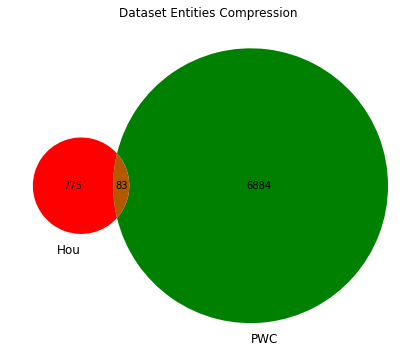

In [ ]:
plt.figure(figsize=(25,6))
venn2([set(hou_dataset['sentence']), set(pwc_dataset_df['dataset_name'])], set_labels = ('Hou', 'PWC') , alpha=1 )
plt.title('Dataset Entities Compression ')
plt.show()

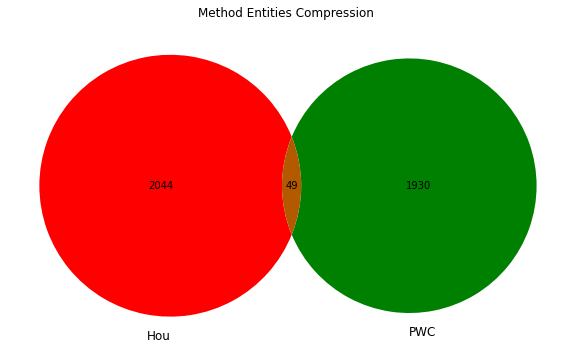

In [ ]:
plt.figure(figsize=(25,6))
venn2([set(hou_method['sentence']), set(pwc_method_df['method_name'])], set_labels = ('Hou', 'PWC') , alpha=1 )
plt.title('Method Entities Compression ')
plt.show()

##### Histogram

Kl divergence: KL(P || Q) = Sum over all bins i (p_i * log(p_i / q_i))

In [ ]:
len(count_pwc_method[count_pwc_method['character'].between(0, 5)])

166

In [ ]:
kl_method_dataframe = pd.DataFrame()
kl_dataset_dataframe = pd.DataFrame()

method_dataframe = pd.DataFrame()
dataset_dataframe = pd.DataFrame()

In [ ]:
index, counts = np.unique(count_hou_method['character'],return_counts=True)
print(index, counts)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 46 47 49 52 53 60] [ 62 251 214 176 185 154 178 131 104  84  56  48  40  43  46  27  26  25
  28  23  23  21  16  18  12   9  19  10   6  10   5   9   6   4   2   3
   2   1   4   2   1   1   1   1   3   1   1   1]


In [ ]:
check = pd.DataFrame(count_hou_method['character'])

check.groupby('character').count()
check['character'].value_counts().sort_index().iloc[0:5].sum()

888

####Method character count between PWC and HOU (frequency bar graph)


KL divergence: 0.44912388487233873
TVD = 0.3694090144317532


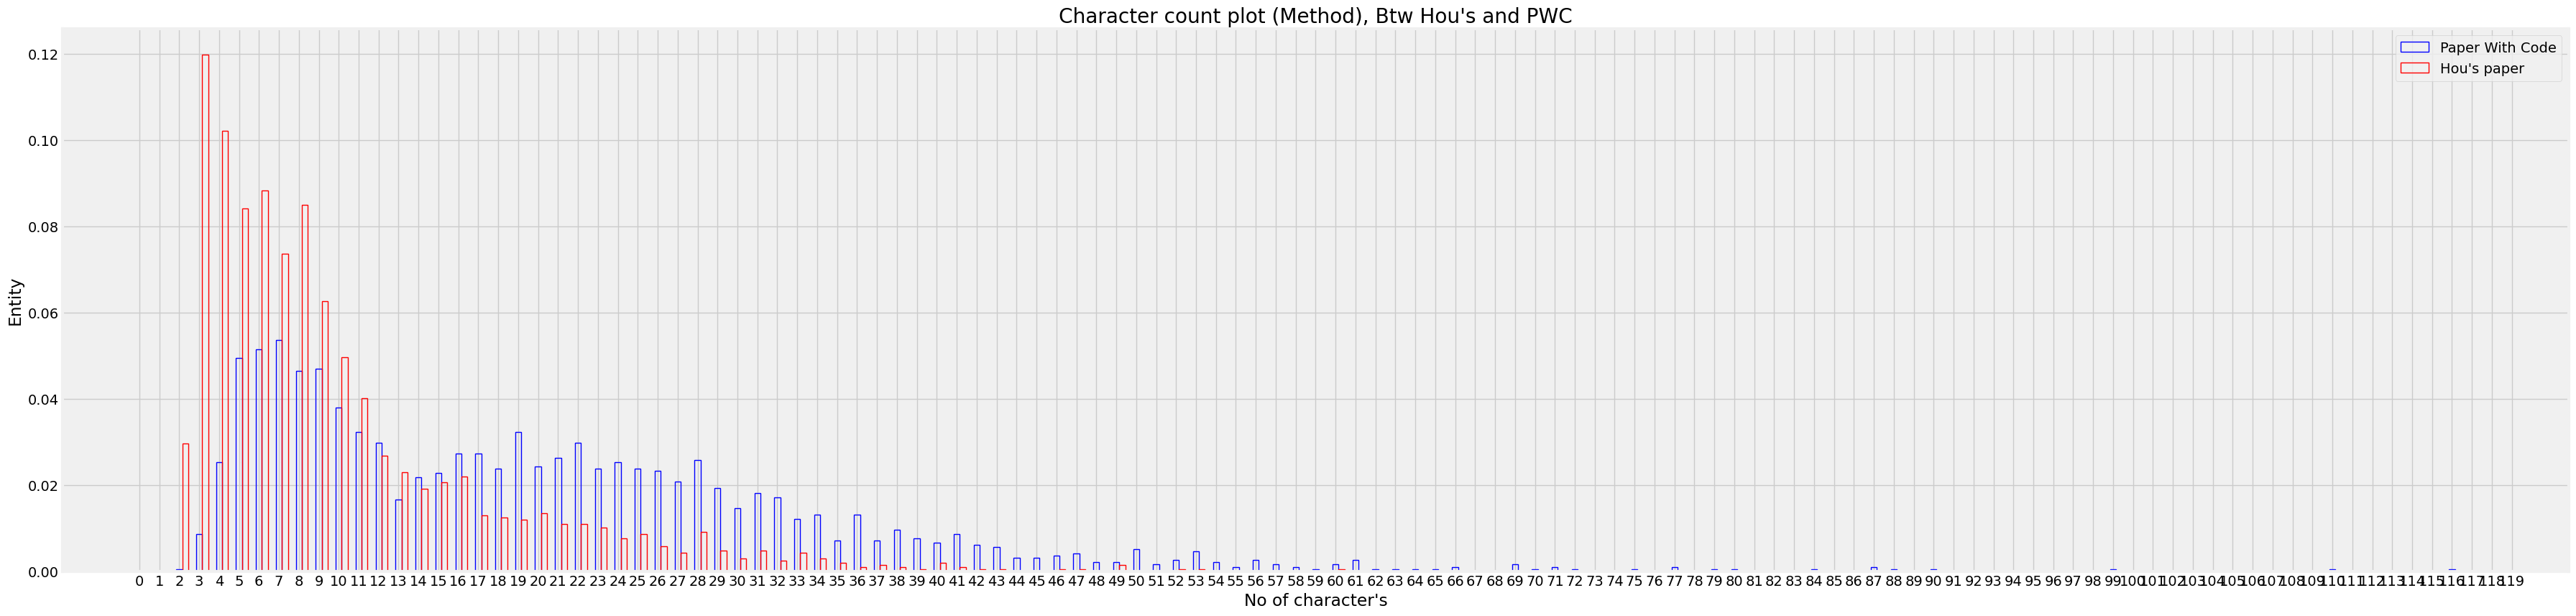

In [ ]:
figure(figsize=(45, 10), dpi=100)

plt.style.use('fivethirtyeight')

# Data for first bar graph
data1 = count_pwc_method['character'].value_counts().sort_index()
x1 = count_pwc_method['character'].value_counts().sort_index().index
# print(data1, x1)
round_x_axis = max(max(count_hou_method['character']), round(max(count_pwc_method['character']),-1))

# Data for second bar graph
data2 = count_hou_method['character'].value_counts().sort_index()
x2 = count_hou_method['character'].value_counts().sort_index().index
# print(data2, x2)

# Normalize data for each graph
data1 = data1 / np.sum(data1)
data2 = data2 / np.sum(data2)



# Plot the bars with no fill
plt.bar(x1, data1, width=0.3, color='none', edgecolor='blue',label='Paper With Code', linewidth= 1)
plt.bar(x2 + 0.3, data2, width=0.3, color='none', edgecolor='red',label="Hou's paper", linewidth = 1)
plt.xticks(np.arange(0,round_x_axis, 1))


#Kl divergence 
kl_divergence = np.sum(data1 * np.log(data1 / data2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(data1 - data2)) 
print("TVD =", tvd)

# Add axis labels and a title
plt.xlabel("No of character's")
plt.ylabel('Entity')
plt.title("Character count plot (Method), Btw Hou's and PWC")


# Add a legend
plt.legend(loc='upper right')


# Show the plot
plt.show()


####Method word count between PWC and HOU (frequency bar graph)


KL divergence: 0.3986542057061282
TVD = 0.383842699032628


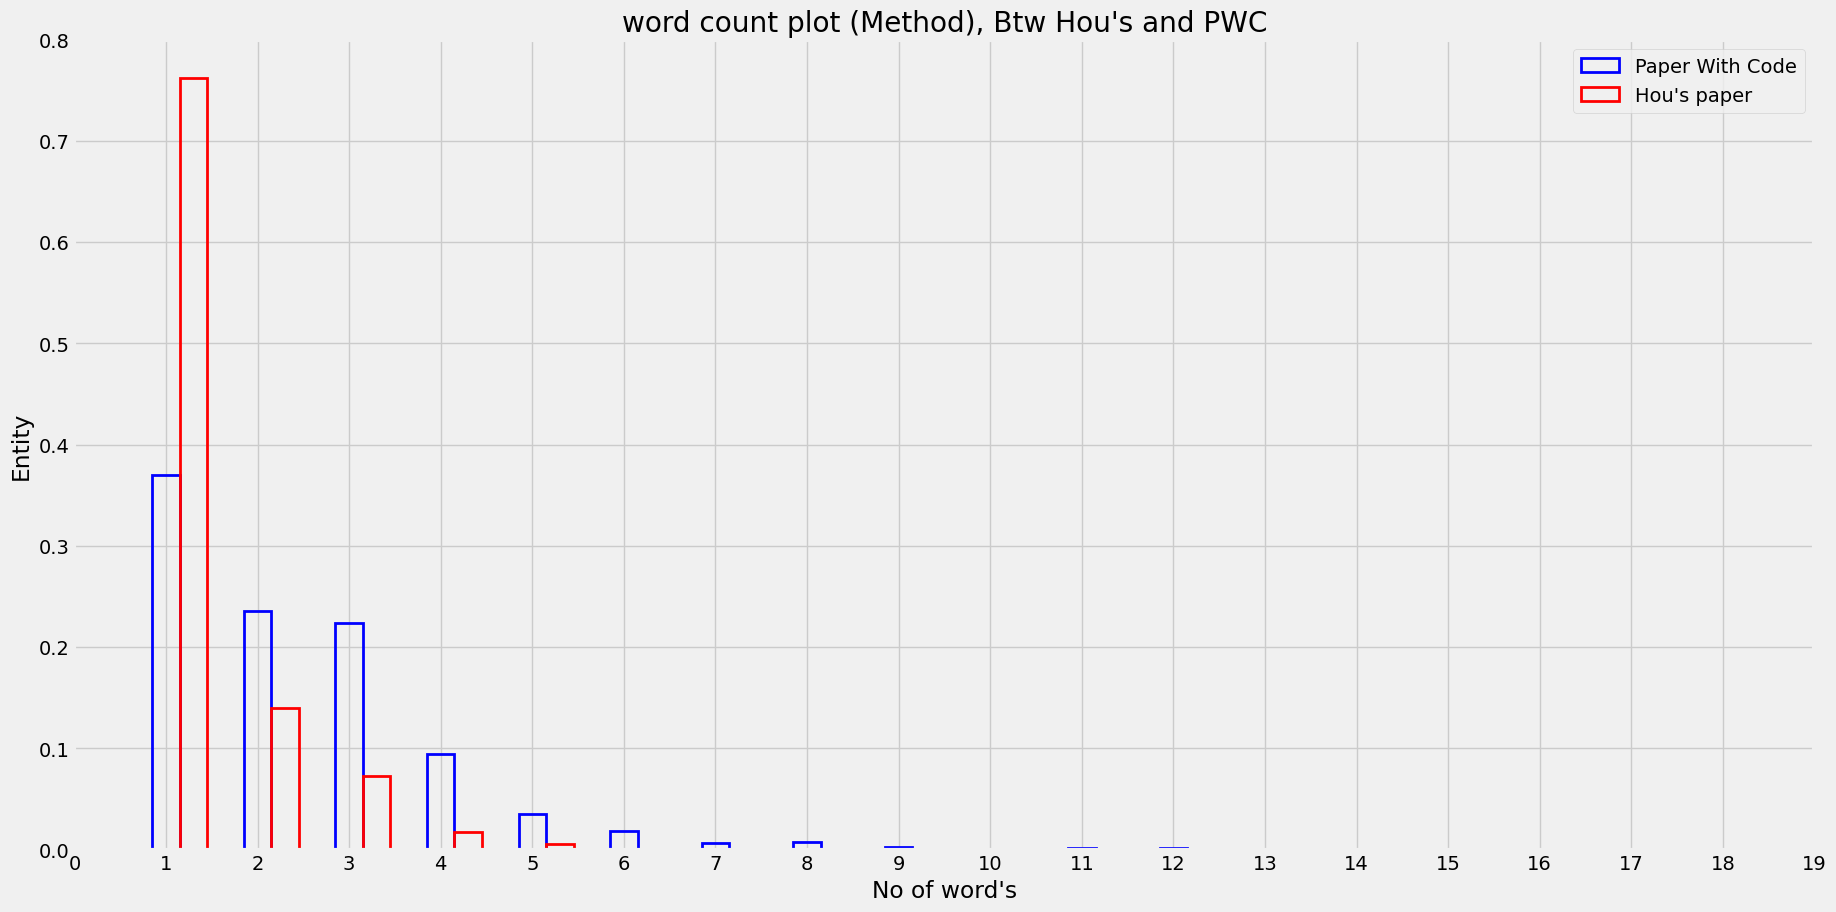

In [ ]:
figure(figsize=(20, 10), dpi=100)

plt.style.use('fivethirtyeight')

# Data for first bar graph
data1 = count_pwc_method['word'].value_counts().sort_index()
x1 = count_pwc_method['word'].value_counts().sort_index().index
# print(data1, x1)
round_x_axis = max(max(count_hou_method['word']), round(max(count_pwc_method['word']),-1))

# Data for second bar graph
data2 = count_hou_method['word'].value_counts().sort_index()
x2 = count_hou_method['word'].value_counts().sort_index().index
# print(data2, x2)

# Normalize data for each graph
data1 = data1 / np.sum(data1)
data2 = data2 / np.sum(data2)



# Plot the bars with no fill
plt.bar(x1, data1, width=0.3, color='none', edgecolor='blue',label='Paper With Code', linewidth= 2)
plt.bar(x2 + 0.3, data2, width=0.3, color='none', edgecolor='red',label="Hou's paper", linewidth = 2)
plt.xticks(np.arange(0,round_x_axis, 1))


#Kl divergence 
kl_divergence = np.sum(data1 * np.log(data1 / data2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(data1 - data2)) 
print("TVD =", tvd)

# Add axis labels and a title
plt.xlabel("No of word's")
plt.ylabel('Entity')
plt.title("word count plot (Method), Btw Hou's and PWC")


# Add a legend
plt.legend(loc='upper right')


# Show the plot
plt.show()


####Method capital character count between PWC and HOU (frequency bar graph)


KL divergence: 0.12164225694792616
TVD = 0.15961902412019952


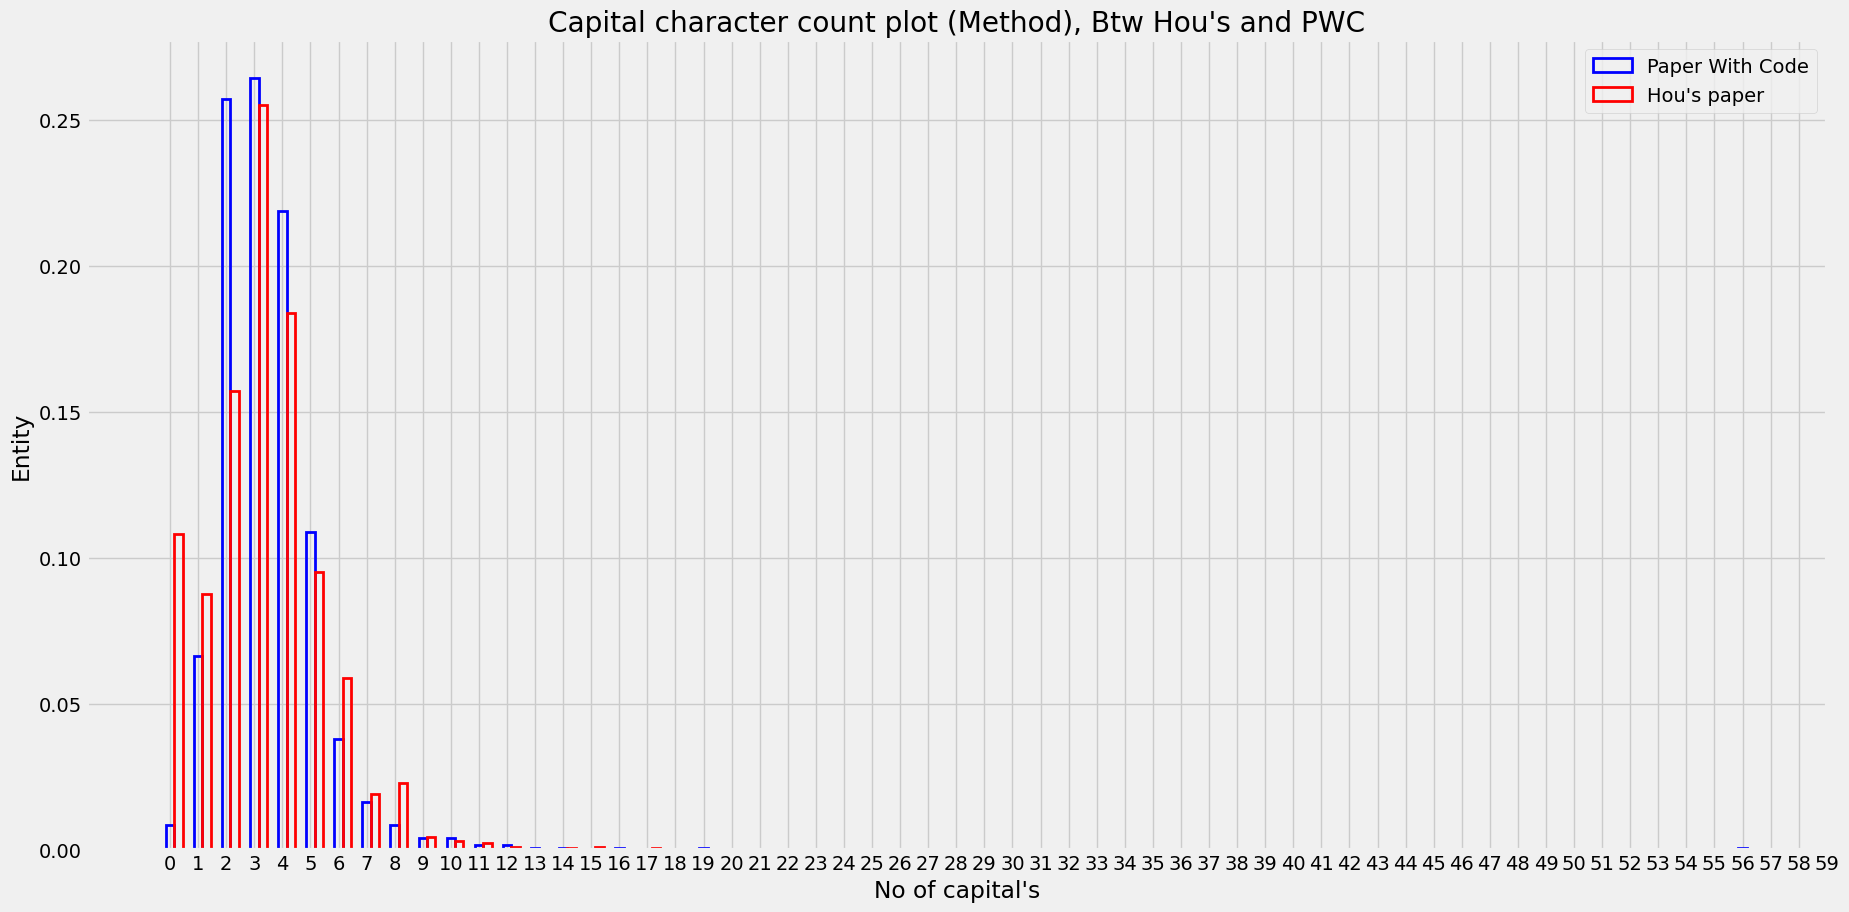

In [ ]:
figure(figsize=(20, 10), dpi=100)

plt.style.use('fivethirtyeight')

# Data for first bar graph
data1 = count_pwc_method['Capital'].value_counts().sort_index()
x1 = count_pwc_method['Capital'].value_counts().sort_index().index
# print(data1, x1)
round_x_axis = max(max(count_hou_method['Capital']), round(max(count_pwc_method['Capital']),-1))

# Data for second bar graph
data2 = count_hou_method['Capital'].value_counts().sort_index()
x2 = count_hou_method['Capital'].value_counts().sort_index().index
# print(data2, x2)

# Normalize data for each graph
data1 = data1 / np.sum(data1)
data2 = data2 / np.sum(data2)



# Plot the bars with no fill
plt.bar(x1, data1, width=0.3, color='none', edgecolor='blue',label='Paper With Code', linewidth= 2)
plt.bar(x2 + 0.3, data2, width=0.3, color='none', edgecolor='red',label="Hou's paper", linewidth = 2)
plt.xticks(np.arange(0,round_x_axis, 1))


#Kl divergence 
kl_divergence = np.sum(data1 * np.log(data1 / data2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(data1 - data2)) 
print("TVD =", tvd)

# Add axis labels and a title
plt.xlabel("No of capital's")
plt.ylabel('Entity')
plt.title("Capital character count plot (Method), Btw Hou's and PWC")


# Add a legend
plt.legend(loc='upper right')


# Show the plot
plt.show()


####Dataset character count between PWC and HOU (frequency bar graph)


KL divergence: 0.1301969696253682
TVD = 0.281256660185898


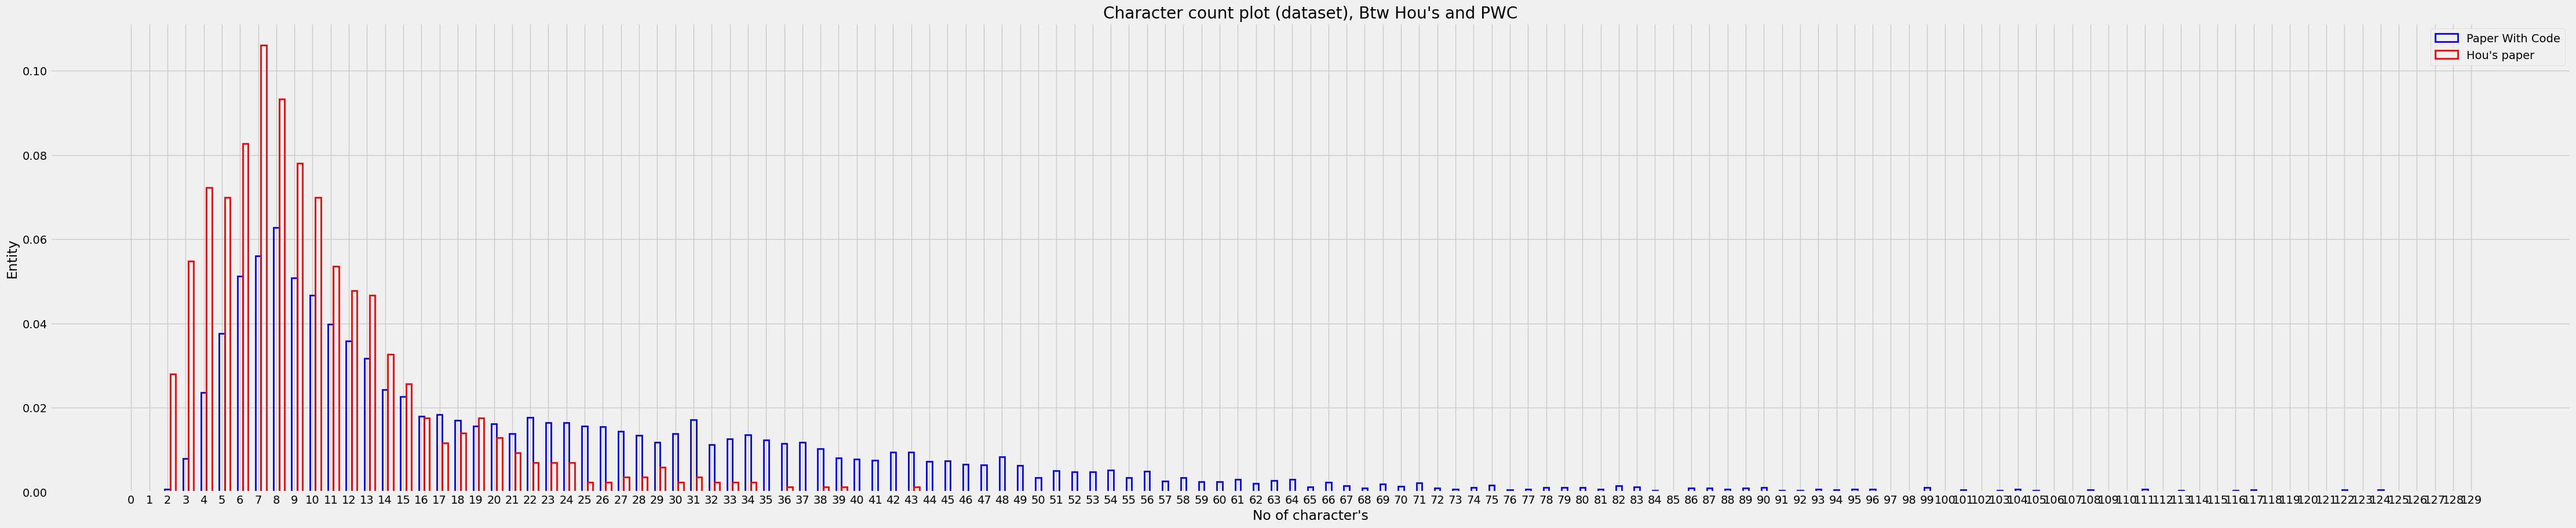

In [ ]:
figure(figsize=(50, 10), dpi=100)

plt.style.use('fivethirtyeight')

# Data for first bar graph
data1 = count_pwc_dataset['character'].value_counts().sort_index()
x1 = count_pwc_dataset['character'].value_counts().sort_index().index
# print(data1, x1)
round_x_axis = max(max(count_hou_dataset['character']), round(max(count_pwc_dataset['character']),-1))

# Data for second bar graph
data2 = count_hou_dataset['character'].value_counts().sort_index()
x2 = count_hou_dataset['character'].value_counts().sort_index().index
# print(data2, x2)

# Normalize data for each graph
data1 = data1 / np.sum(data1)
data2 = data2 / np.sum(data2)



# Plot the bars with no fill
plt.bar(x1, data1, width=0.3, color='none', edgecolor='blue',label='Paper With Code', linewidth= 2)
plt.bar(x2 + 0.3, data2, width=0.3, color='none', edgecolor='red',label="Hou's paper", linewidth = 2)
plt.xticks(np.arange(0,round_x_axis, 1))


#Kl divergence 
kl_divergence = np.sum(data1 * np.log(data1 / data2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(data1 - data2)) 
print("TVD =", tvd)

# Add axis labels and a title
plt.xlabel("No of character's")
plt.ylabel('Entity')
plt.title("Character count plot (dataset), Btw Hou's and PWC")


# Add a legend
plt.legend(loc='upper right')


# Show the plot
plt.show()


####Dataset word count between PWC and HOU (frequency bar graph)


KL divergence: 0.2835817721816349
TVD = 0.29403986760094125


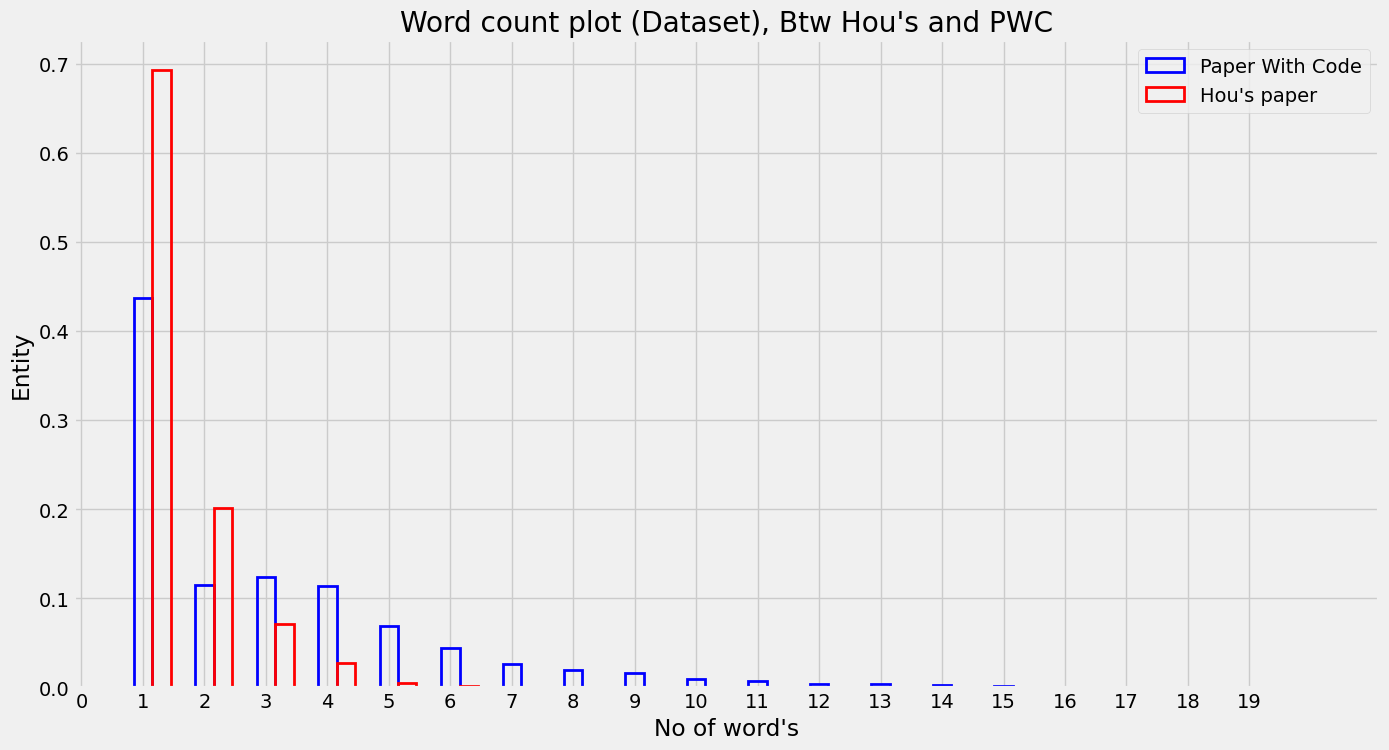

In [ ]:
figure(figsize=(15, 8), dpi=100)

plt.style.use('fivethirtyeight')

# Data for first bar graph
data1 = count_pwc_dataset['word'].value_counts().sort_index()
x1 = count_pwc_dataset['word'].value_counts().sort_index().index
# print(data1, x1)
round_x_axis = max(max(count_hou_dataset['word']), round(max(count_pwc_dataset['word']),-1))

# Data for second bar graph
data2 = count_hou_dataset['word'].value_counts().sort_index()
x2 = count_hou_dataset['word'].value_counts().sort_index().index
# print(data2, x2)

# Normalize data for each graph
data1 = data1 / np.sum(data1)
data2 = data2 / np.sum(data2)



# Plot the bars with no fill
plt.bar(x1, data1, width=0.3, color='none', edgecolor='blue',label='Paper With Code', linewidth= 2)
plt.bar(x2 + 0.3, data2, width=0.3, color='none', edgecolor='red',label="Hou's paper", linewidth = 2)
plt.xticks(np.arange(0,round_x_axis, 1))


#Kl divergence 
kl_divergence = np.sum(data1 * np.log(data1 / data2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(data1 - data2)) 
print("TVD =", tvd)

# Add axis labels and a title
plt.xlabel("No of word's")
plt.ylabel('Entity')
plt.title("Word count plot (Dataset), Btw Hou's and PWC")


# Add a legend
plt.legend(loc='upper right')


# Show the plot
plt.show()


####Dataset chapital character count between PWC and HOU (frequency bar graph)


KL divergence: 0.18434626702480655
TVD = 0.23721838182868754


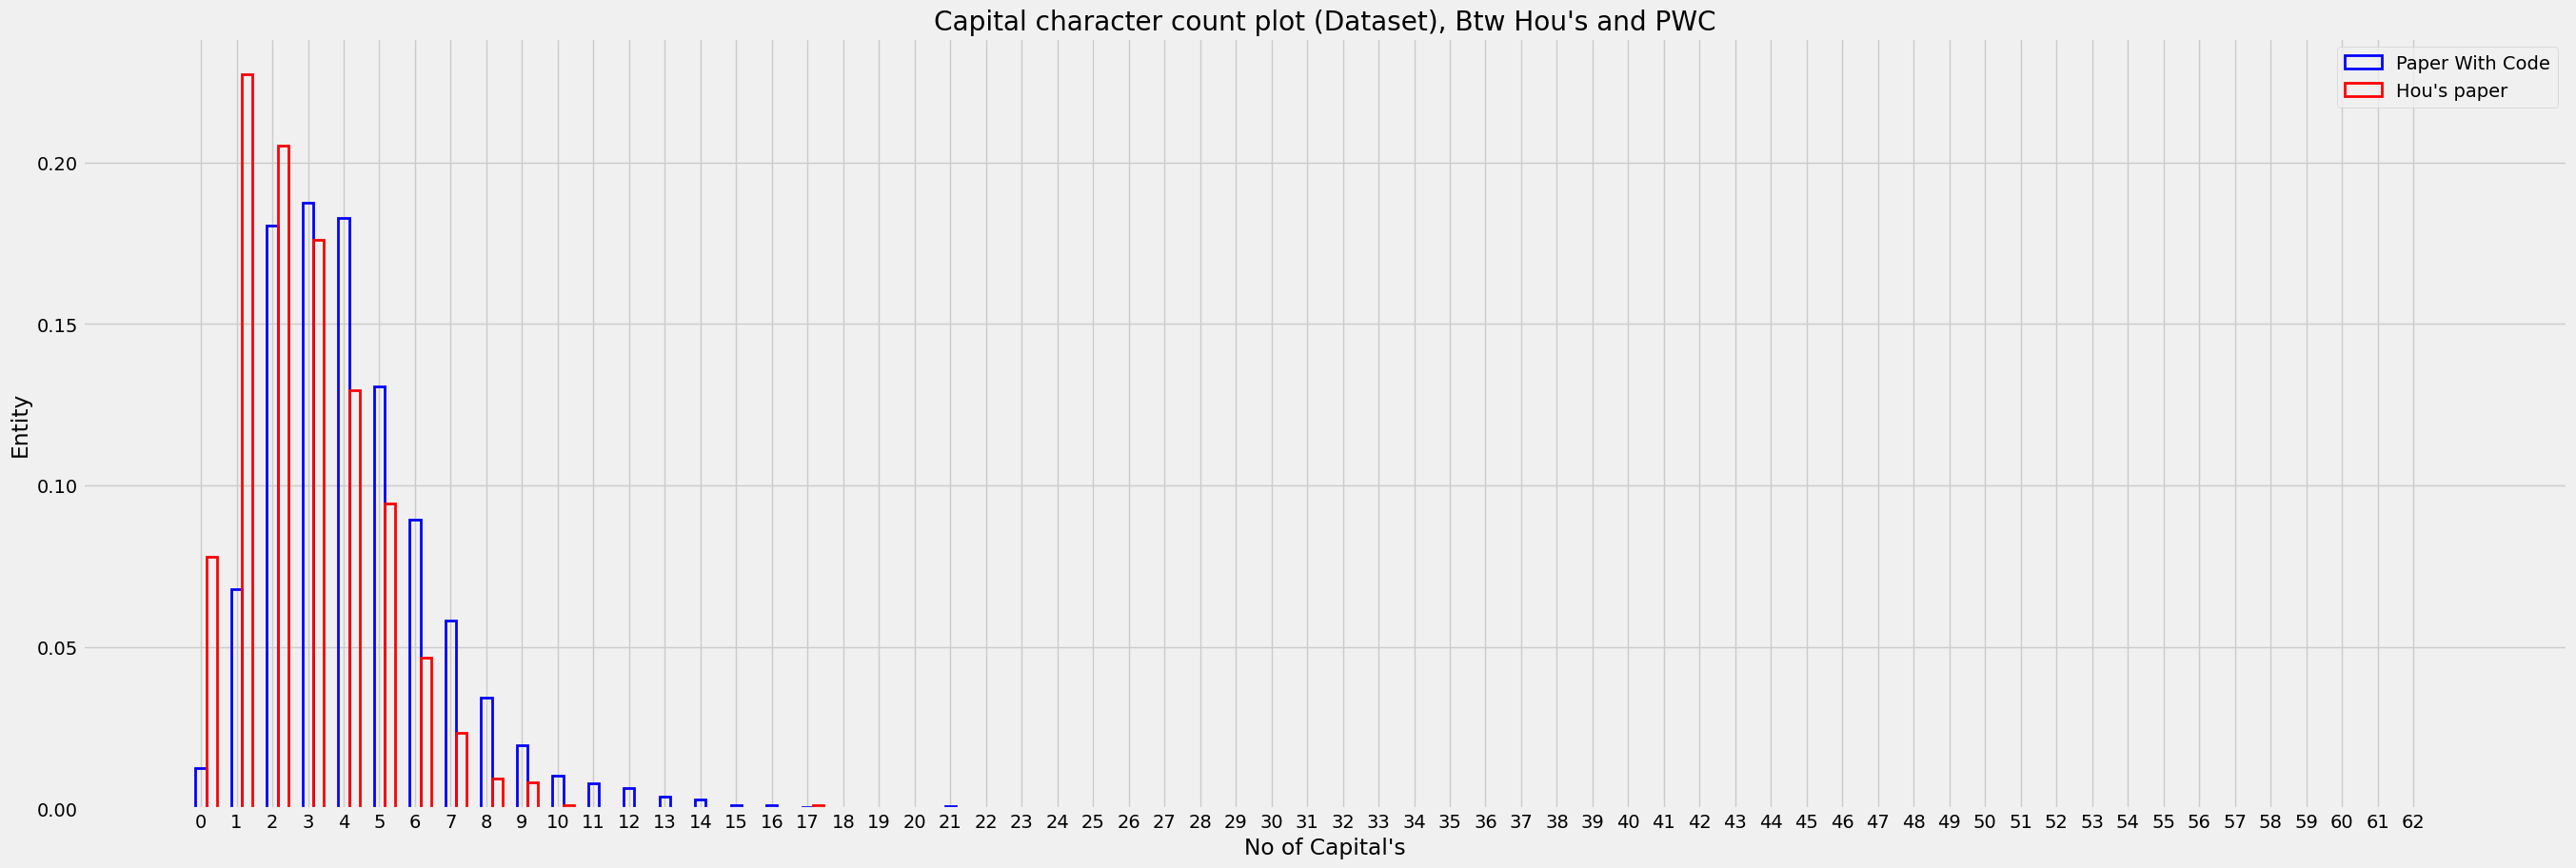

In [ ]:
figure(figsize=(30, 10), dpi=100)

plt.style.use('fivethirtyeight')

# Data for first bar graph
data1 = count_pwc_dataset['Capital'].value_counts().sort_index()
x1 = count_pwc_dataset['Capital'].value_counts().sort_index().index
# print(data1, x1)
round_x_axis = max(max(count_hou_dataset['Capital']), max(count_pwc_dataset['Capital']))

# Data for second bar graph
data2 = count_hou_dataset['Capital'].value_counts().sort_index()
x2 = count_hou_dataset['Capital'].value_counts().sort_index().index
# print(data2, x2)

# Normalize data for each graph
data1 = data1 / np.sum(data1)
data2 = data2 / np.sum(data2)



# Plot the bars with no fill
plt.bar(x1, data1, width=0.3, color='none', edgecolor='blue',label='Paper With Code', linewidth= 2)
plt.bar(x2 + 0.3, data2, width=0.3, color='none', edgecolor='red',label="Hou's paper", linewidth = 2)
# plt.yticks(np.arange(0,1350, 10))
plt.xticks(np.arange(0,round_x_axis, 1))


#Kl divergence 
kl_divergence = np.sum(data1 * np.log(data1 / data2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(data1 - data2)) 
print("TVD =", tvd)

# Add axis labels and a title
plt.xlabel("No of Capital's")
plt.ylabel('Entity')
plt.title("Capital character count plot (Dataset), Btw Hou's and PWC")


# Add a legend
plt.legend(loc='upper right')


# Show the plot
plt.show()


####Method character count PWC and HOU (Histogram)






Bin size of pwc is 12 and hou's is 13
The variance between the two datasets is significantly different (p-value = 3.4372681293336037e-169 )
KL divergence: 0.07356288918519387
TVD = 0.15749266003017345


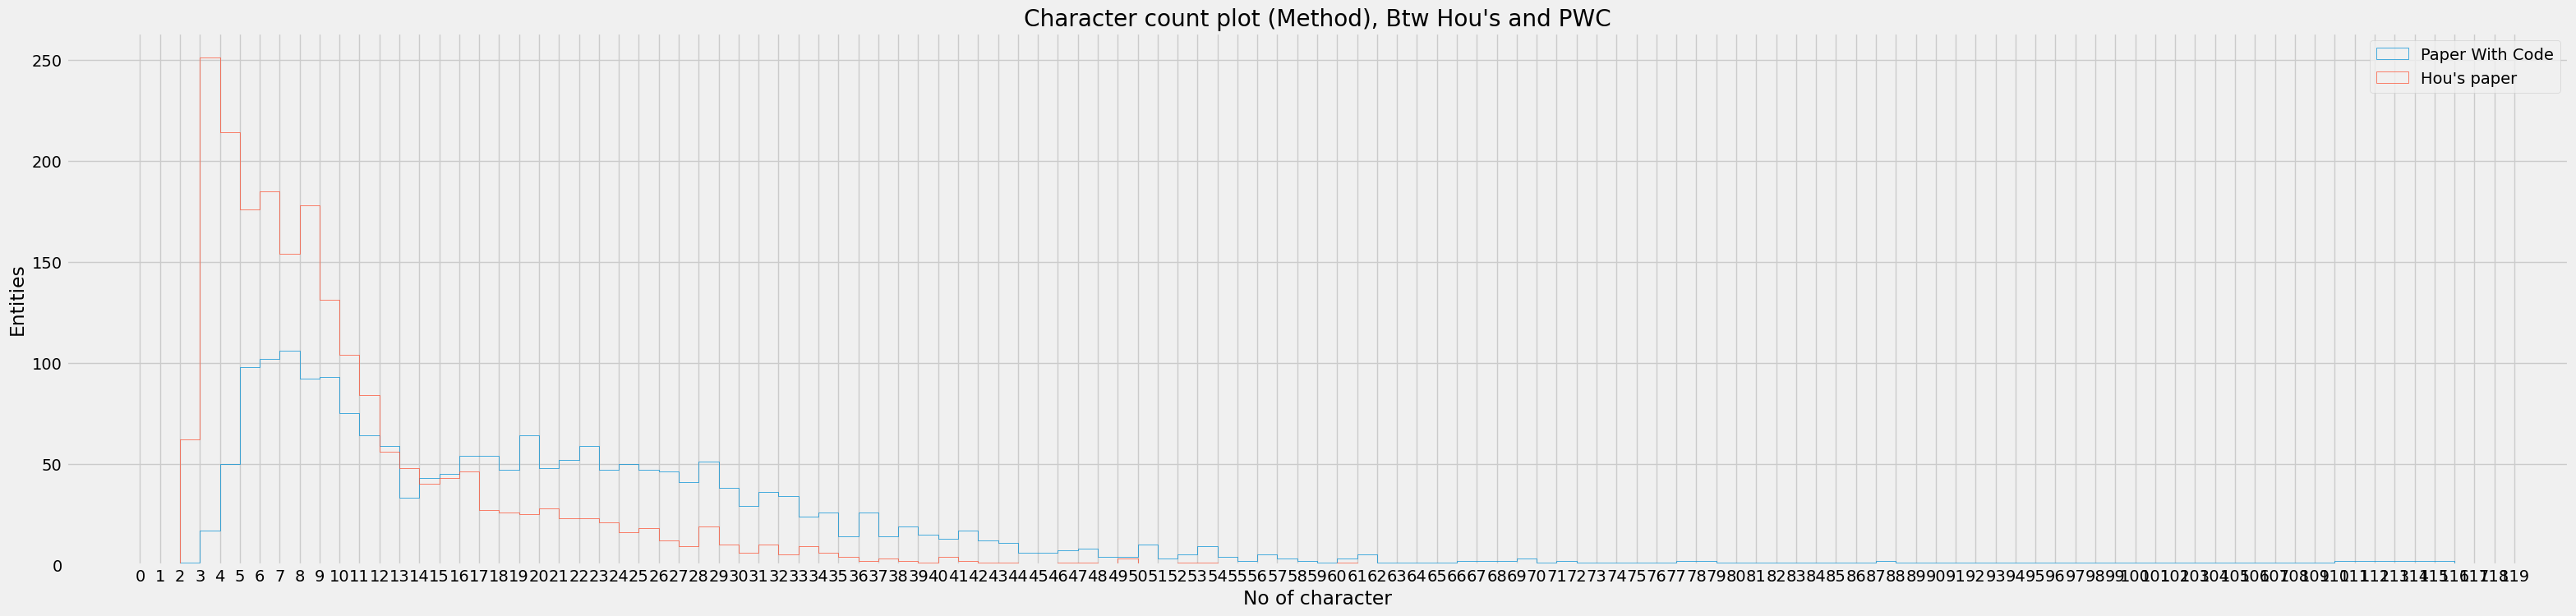

In [ ]:
figure(figsize=(35, 8), dpi=100)
# plt.hist([count_pwc_method['character'],count_hou_method['character']],
        
#           # bins=60, 
#         #  range=(0,70),
#          histtype= 'step', density = True)

# plt.style.use('fivethirtyeight')
bins1 = math.ceil(math.log2(len(count_pwc_method['character'])) + 1)
bins2 = math.ceil(math.log2(len(count_hou_method['character'])) + 1)
bins = max(bins1, bins2)


method_dataframe["pwc_method_chr"]  = count_pwc_method['character'].value_counts().sort_index()
method_dataframe["hou_method_chr"]  = count_hou_method['character'].value_counts().sort_index()

bin_counts1, bin_edges1, patches = plt.hist(count_pwc_method['character'],label='Paper With Code',bins=count_pwc_method['character'].value_counts().sort_index().index.to_list(),  histtype= 'step')
bin_counts2, bin_edges2, patches = plt.hist(count_hou_method['character'],label="Hou's paper",  bins=bin_edges1, histtype= 'step')

round_x_axis = max(max(count_hou_method['character']), round(max(count_pwc_method['character']),-1))
plt.xticks(np.arange(0,round_x_axis, 1))
# print(bin_counts1, bin_edges1, patches)
# print(bin_counts2, bin_edges2, patches)
# bin_edges = np.linspace(min(bin_edges1[0], bin_edges2[0]), max(bin_edges1[-1], bin_edges2[-1]), max(len(bin_edges1), len(bin_edges2)))

print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

#F test 
f_statistic, p_value = f_oneway(count_pwc_method['character'], count_hou_method['character'])

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")

# Re-bin each histogram using the common bin edges
hist1,_ = np.histogram(count_pwc_method['character'], bins=bins)
hist2, _ = np.histogram(count_hou_method['character'], bins=bins)



# Normalize the histograms to convert them into probability distributions
p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()



#Kl divergence dataframe 
kl_method_dataframe["p1_pwc_char"] = p1
kl_method_dataframe["p2_pwc_char"] = p2

kl_divergence = np.sum(p1 * np.log(p1 / p2))

print('KL divergence:', kl_divergence)

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2)) 
print("TVD =", tvd)
plt.gca().set()
plt.xlabel('No of character')
plt.ylabel('Entities')

plt.title("Character count plot (Method), Btw Hou's and PWC")
# plt.legend(['Paper With Code', "Hou's paper"])
plt.legend(loc='upper right')
plt.show()

In [ ]:
display(count_pwc_method['character'].value_counts().sort_index().to_string())
print(count_hou_method['character'].value_counts().sort_index())


In [ ]:
print(count_hou_method['character'].value_counts().sort_index())
method_dataframe.to_csv("c.csv")


####Method word count PWC and HOU 




In [ ]:
print(count_pwc_method['word'].value_counts())
print(method_dataframe["pwc_method_wrd"].index.to_list())
count_hou_method['word'].value_counts()

1     733
2     467
3     443
4     187
5      69
6      36
8      15
7      13
9       6
11      3
12      3
10      2
13      1
15      1
Name: word, dtype: int64
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 75, 77, 79, 80, 84, 87, 88, 90, 99, 110, 116]


1    1595
2     293
3     153
4      37
5      12
6       2
7       1
Name: word, dtype: int64

In [ ]:
print(len(count_pwc_method['word'].value_counts()))
len(count_hou_method['word'].value_counts())

14


7

In [ ]:
method_dataframe

,pwc_method_chr,hou_method_chr,pwc_method_wrd,hou_method_wrd
2,1,62.0,467.0,293.0
3,17,251.0,443.0,153.0
4,50,214.0,187.0,37.0
5,98,176.0,69.0,12.0
6,102,185.0,36.0,2.0
...,...,...,...,...
88,1,NaN,NaN,NaN
90,1,NaN,NaN,NaN
99,1,NaN,NaN,NaN
110,1,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
<ipython-input-51-fabda0800559>:51: RuntimeWarning: divide by zero encountered in true_divide
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))


Bin size of pwc is 12 and hou's is 13
The variance between the two datasets is significantly different (p-value = 4.584789052983647e-136 )
TVD = 0.2709264284060514
KL divergence: inf


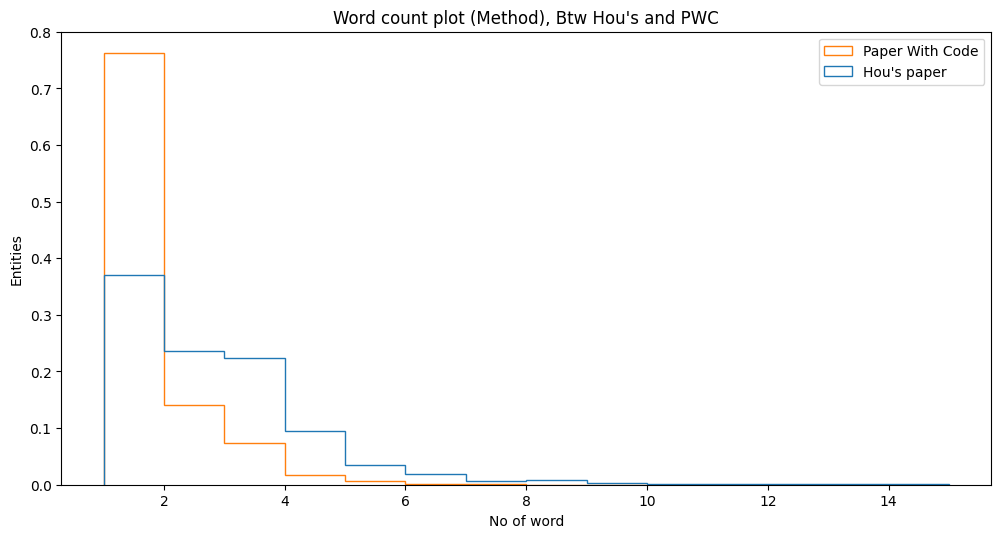

In [ ]:
figure(figsize=(12, 6), dpi=100)

bins1 = math.ceil(math.log2(len(count_pwc_method['word'])) + 1)
bins2 = math.ceil(math.log2(len(count_hou_method['word'])) + 1)
# print(len(count_pwc_method['word']), len(count_hou_method['word']))
bins = max(bins1, bins2)


method_dataframe["pwc_method_wrd"]  = count_pwc_method['word'].value_counts().sort_index()
method_dataframe["hou_method_wrd"]  = count_hou_method['word'].value_counts().sort_index()


plt.hist([count_pwc_method['word'],count_hou_method['word']],
           bins= count_pwc_method['word'].value_counts().sort_index().index.to_list(), 
          histtype= 'step',
          density=True)

round_x_axis = max(max(count_hou_method['word']), round(max(count_pwc_method['word']),-1))

# bin_counts1, bin_edges1, patches = plt.hist(count_pwc_method['word'], bins= count_pwc_method['word'].value_counts().sort_index().index.to_list(), histtype= 'step', label='Paper With Code', density=True)
# bin_counts2, bin_edges2, patches = plt.hist(count_hou_method['word'], bins= bin_edges1, histtype= 'step', label="Hou's paper", density =True)

# print(len(a),len(b),len(c))
# plt.legend(loc='upper right')

print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

#F test 
f_statistic, p_value = f_oneway(count_pwc_method['word'], count_hou_method['word'])

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")


hist1, _  = np.histogram(count_pwc_method['word'], bins=bins, density=True)
hist2, _ = np.histogram(count_hou_method['word'], bins=bins, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

#Kl divergence dataframe 
kl_method_dataframe["p1_pwc_word"] = p1
kl_method_dataframe["p2_pwc_word"] = p2

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)

plt.xlabel('No of word')
plt.ylabel('Entities')

plt.title("Word count plot (Method), Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"],loc='upper right')
plt.show()

####Method Capital count PWC and HOU



In [ ]:
figure(figsize=(35, 8), dpi=100)

# plt.hist(count_hou_method['Capital'], bins=bins, histtype= 'step', label="Hou's paper")
plt.hist(count_pwc_method['Capital'], bins=bins, histtype='bar',label='Paper With Code')
plt.xticks(np.arange(0,max(count_pwc_method['Capital']), 1))

plt.legend()

In [ ]:
count_pwc_method[count_pwc_method['Capital']>50]

,character,word,Capital
312,64,8,56


In [ ]:
method_dataframe[method_dataframe["pwc_method_capital"].notnull()]

,pwc_method_chr,hou_method_chr,hou_method_wrd,pwc_method_wrd,hou_method_capital,pwc_method_capital
2,1,62.0,293.0,467.0,329.0,509.0
3,17,251.0,153.0,443.0,534.0,523.0
4,50,214.0,37.0,187.0,385.0,433.0
5,98,176.0,12.0,69.0,199.0,215.0
6,102,185.0,2.0,36.0,123.0,75.0
7,106,154.0,1.0,13.0,40.0,32.0
8,92,178.0,NaN,15.0,48.0,17.0
9,93,131.0,NaN,6.0,9.0,8.0
10,75,104.0,NaN,2.0,6.0,8.0
11,64,84.0,NaN,3.0,5.0,3.0


In [ ]:
method_dataframe[method_dataframe["pwc_method_capital"].notnull()]

,pwc_method_chr,hou_method_chr,pwc_method_wrd,hou_method_wrd,hou_method_capital,pwc_method_capital
2,1,62.0,467.0,293.0,329.0,509.0
3,17,251.0,443.0,153.0,534.0,523.0
4,50,214.0,187.0,37.0,385.0,433.0
5,98,176.0,69.0,12.0,199.0,215.0
6,102,185.0,36.0,2.0,123.0,75.0
7,106,154.0,13.0,1.0,40.0,32.0
8,92,178.0,15.0,NaN,48.0,17.0
9,93,131.0,6.0,NaN,9.0,8.0
10,75,104.0,2.0,NaN,6.0,8.0
11,64,84.0,3.0,NaN,5.0,3.0


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 19, 56]
The variance between the two datasets is significantly different (p-value = 0.0032760084567939394 )
Bin size of pwc is 12 and hou's is 13
TVD = 0.6337803506333946
KL divergence: 1.13362874566119


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
<ipython-input-61-b1655016c6d6>:50: RuntimeWarning: divide by zero encountered in log
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
<ipython-input-61-b1655016c6d6>:50: RuntimeWarning: invalid value enco

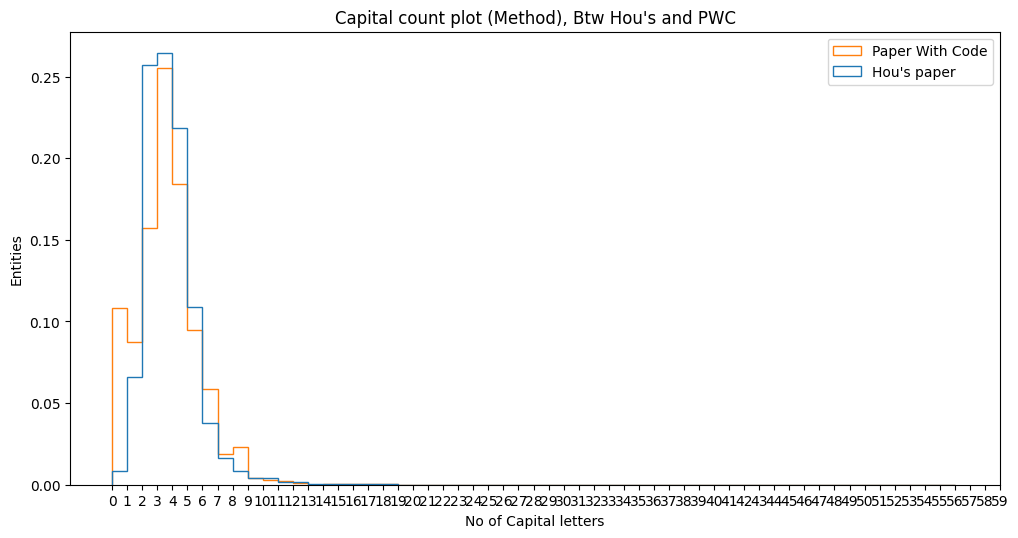

In [ ]:
figure(figsize=(12, 6), dpi=100)

bins1 = math.ceil(math.log2(len(count_pwc_method['Capital'])) + 1)
bins2 = math.ceil(math.log2(len(count_hou_method['Capital'])) + 1)

bins = max(bins1, bins2)



method_dataframe["hou_method_capital"]  = count_hou_method['Capital'].value_counts()

method_dataframe["pwc_method_capital"]  = count_pwc_method['Capital'].value_counts()

# bin_counts1, bin_edges1, patches =  plt.hist(count_pwc_method['Capital'], bins=count_hou_method['Capital'].value_counts().sort_index().index.to_list(),  histtype= 'step',label='Paper With Code')
# bin_counts2, bin_edges2, patches = plt.hist(count_hou_method['Capital'], bins=bin_edges1, histtype= 'step', label="Hou's paper")
print(count_pwc_method['Capital'].value_counts().sort_index().index.to_list())
plt.hist([count_pwc_method['Capital'],count_hou_method['Capital']],
           bins=count_pwc_method['Capital'].value_counts().sort_index().index.to_list(),# range=(1,15), 
          histtype= 'step',
          density=True)

round_x_axis = max(max(count_hou_method['Capital']), round(max(count_pwc_method['Capital']),-1))
plt.xticks(np.arange(0,round_x_axis, 1))

#F test 
f_statistic, p_value = f_oneway(count_pwc_method['Capital'], count_hou_method['Capital'])

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")


print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

hist1, _  = np.histogram(count_pwc_method['Capital'], bins=bins, density=True)
hist2, _ = np.histogram(count_hou_method['Capital'], bins=bins, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

#Kl divergence dataframe 
kl_method_dataframe["p1_pwc_capital"] = p1
kl_method_dataframe["p2_pwc_capital"] = p2

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)

plt.xlabel('No of Capital letters')
plt.ylabel('Entities')

plt.title("Capital count plot (Method), Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"],loc='upper right')
plt.show()

In [ ]:
method_dataframe.sort_index()
method_dataframe.to_csv("method_dataframe.csv")
method_dataframe

####Dataset character count PWC and HOU 


The variance between the two datasets is significantly different (p-value = 2.0872393109002918e-85 )
Bin size of pwc is 14 and hou's is 11
TVD = 0.18822333591961832
KL divergence: 0.1154824963070513


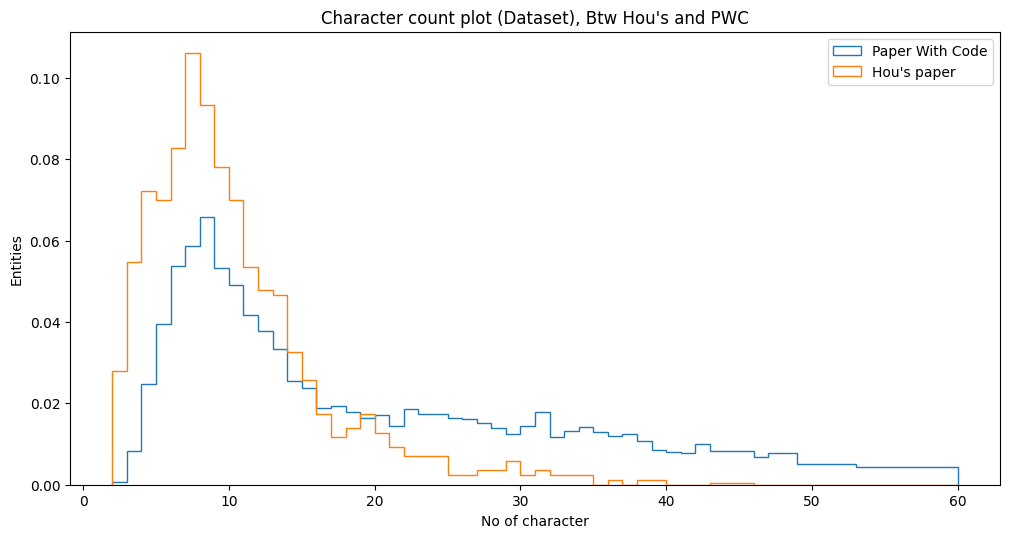

In [ ]:
figure(figsize=(12, 6), dpi=100)
# plt.hist([count_pwc_dataset['character'],count_hou_dataset['character']],
#           # bins=80, range=(0,140),
#            histtype= 'step', label= 'pwc Hou', density=True)

bins1 = math.ceil(math.log2(len(count_pwc_dataset['character'])) + 1)
bins2 = math.ceil(math.log2(len(count_hou_dataset['character'])) + 1)

bins = max(bins1, bins2)


dataset_dataframe["hou_method_char"]  = count_hou_method['character'].value_counts()

dataset_dataframe["pwc_method_chr"]  = count_pwc_method['character'].value_counts()



bin_counts1, bin_edges1, patches = plt.hist(count_pwc_dataset['character'], bins=count_hou_method['character'].value_counts().sort_index().index.to_list(),  histtype= 'step',label='Paper With Code', density=True)
bin_counts2, bin_edges1, patches = plt.hist(count_hou_dataset['character'], bins=bin_edges1, histtype= 'step', label="Hou's paper", density =True)

#F test 
f_statistic, p_value = f_oneway(count_pwc_dataset['character'], count_hou_dataset['character'])

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")

print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

hist1, _  = np.histogram(count_pwc_dataset['character'], bins=bins, density=True)
hist2, _ = np.histogram(count_hou_dataset['character'], bins=bins, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

#Kl divergence dataframe 
kl_dataset_dataframe["p1_pwc_char"] = p1
kl_dataset_dataframe["p2_pwc_char"] = p2

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)

plt.xlabel('No of character')
plt.ylabel('Entities')

plt.title("Character count plot (Dataset), Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"])

plt.show()

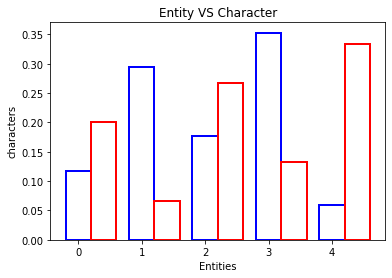

In [ ]:
#@title
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# figure(figsize=(15, 8), dpi=100)
plt.bar(x1, data1, width=0.4, color='none', edgecolor='blue', linewidth=2)
plt.bar(x2 + 0.4, data2, width=0.4, color='none', edgecolor='red', linewidth=2)
plt.xlabel("Entities")
plt.ylabel("characters")
plt.title("Entity VS Character")

plt.show()

[0 1 2 3 4]


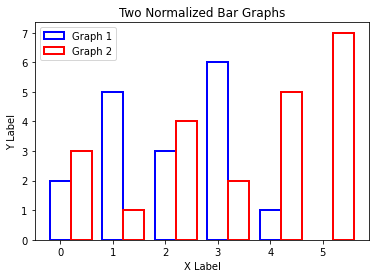

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for first bar graph
data1 = np.array([2, 5, 3, 6, 1])
x1 = np.arange(len(data1))
print(x1)
# Data for second bar graph
data2 = np.array([3, 1, 4, 2, 5, 7])
x2 = np.arange(len(data2))

# Normalize data for each graph
# data1 = data1 / np.sum(data1)
# data2 = data2 / np.sum(data2)

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the bars with no fill
ax.bar(x1, data1, width=0.4, color='none', edgecolor='blue', linewidth=2)
ax.bar(x2 + 0.4, data2, width=0.4, color='none', edgecolor='red', linewidth=2)

# Add axis labels and a title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Two Normalized Bar Graphs')

# Add a legend
ax.legend(['Graph 1', 'Graph 2'])

# Set the x-axis ticks to be the center of each bar
# ax.set_xticks(x1 + 0.2)

# Set the x-axis tick labels
# ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])

# Show the plot
plt.show()


####Dataset word count PWC and HOU 


15
The variance between the two datasets is significantly different (p-value = 1.8910576068164027e-63 )
Bin size of pwc is 14 and hou's is 11
TVD = 0.21759724415099757
KL divergence: inf


<ipython-input-63-0d8084ac6a62>:46: RuntimeWarning: divide by zero encountered in true_divide
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))


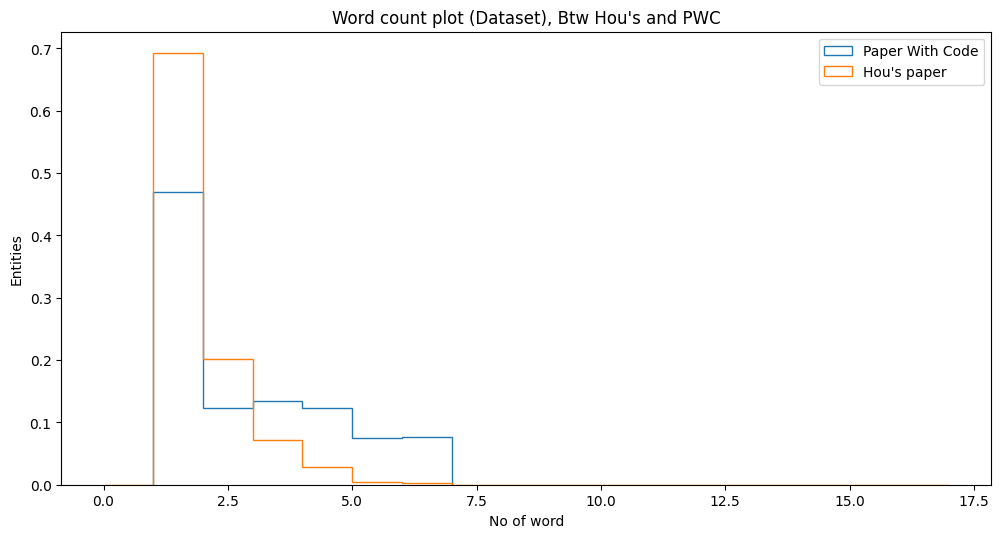

In [ ]:
figure(figsize=(12, 6), dpi=100)
# plt.hist([count_pwc_dataset['word'],count_hou_dataset['word']],
#           # bins=10, range=(1,20), 
#           histtype= 'step', density=True)

bins1 = math.ceil(math.log2(len(count_pwc_dataset['word'])) + 1)
bins2 = math.ceil(math.log2(len(count_hou_dataset['word'])) + 1)

bins = max(bins1, bins2)

dataset_dataframe["hou_method_wrd"]  = count_hou_method['word'].value_counts()

dataset_dataframe["pwc_method_wrd"]  = count_pwc_method['word'].value_counts()



print(len(np.histogram_bin_edges(count_pwc_dataset['word'], 'sturges')))
bin_counts1, bin_edges1, patches = plt.hist(count_pwc_dataset['word'], bins=count_hou_method['word'].value_counts().sort_index().index.to_list(),  histtype= 'step',label='Paper With Code', density=True)
bin_counts2, bin_edges2, patches = plt.hist(count_hou_dataset['word'], bins=bin_edges2, histtype= 'step', label="Hou's paper", density =True)

#F test 
f_statistic, p_value = f_oneway(count_pwc_dataset['word'], count_hou_dataset['word'])

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")


print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

hist1, _  = np.histogram(count_pwc_dataset['word'], bins=bins, density=True)
hist2, _ = np.histogram(count_hou_dataset['word'], bins=bins, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

#Kl divergence dataframe 
kl_dataset_dataframe["p1_pwc_word"] = p1
kl_dataset_dataframe["p2_pwc_word"] = p2

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)

plt.xlabel('No of word')
plt.ylabel('Entities')

plt.title("Word count plot (Dataset), Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"])
plt.show()

####Dataset Capital count PWC and HOU



The variance between the two datasets is significantly different (p-value = 4.999719960461605e-49 )
Bin size of pwc is 14 and hou's is 11
TVD = 0.4339629080550568
KL divergence: inf


<ipython-input-64-80b3a5e6b916>:42: RuntimeWarning: divide by zero encountered in true_divide
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
<ipython-input-64-80b3a5e6b916>:42: RuntimeWarning: invalid value encountered in true_divide
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
<ipython-input-64-80b3a5e6b916>:42: RuntimeWarning: divide by zero encountered in log
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
<ipython-input-64-80b3a5e6b916>:42: RuntimeWarning: invalid value encountered in multiply
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))


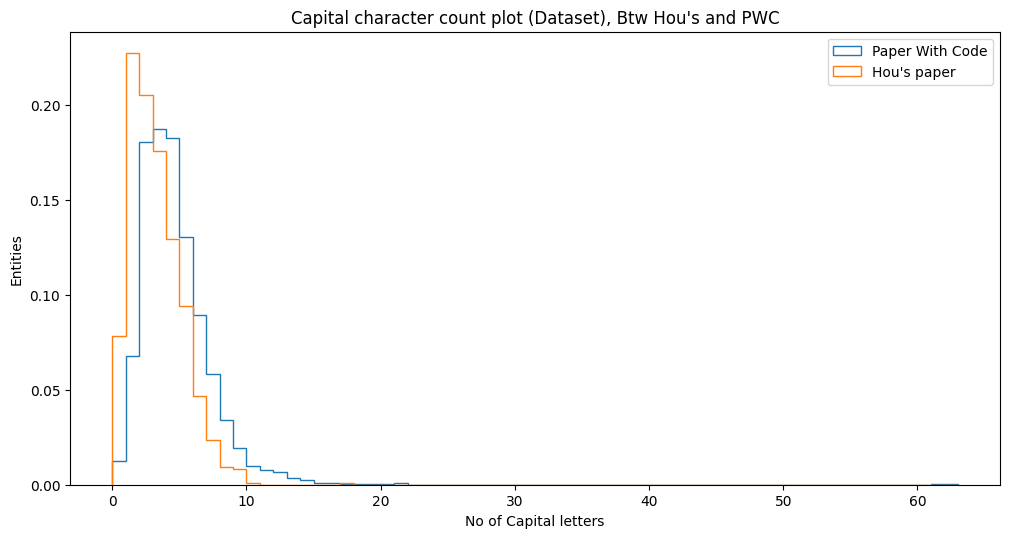

In [ ]:
figure(figsize=(12, 6), dpi=100)

bins1 = math.ceil(math.log2(len(count_pwc_dataset['Capital'])) + 1)
bins2 = math.ceil(math.log2(len(count_hou_dataset['Capital'])) + 1)

bins = max(bins1, bins2)


# dataset_dataframe["hou_method_capital"]  = count_hou_method['Capital'].value_counts()

# dataset_dataframe["pwc_method_capital"]  = count_pwc_method['Capital'].value_counts()


bin_counts1, bin_edges1, patches = plt.hist(count_pwc_dataset['Capital'], bins=count_pwc_dataset['Capital'].value_counts().sort_index().index.to_list(),  histtype= 'step',label='Paper With Code', density=True)
bin_counts2, bin_edges2, patches = plt.hist(count_hou_dataset['Capital'], bins=bin_edges1, histtype= 'step', label="Hou's paper", density =True)

#F test 
f_statistic, p_value = f_oneway(count_pwc_dataset['Capital'], count_hou_dataset['Capital'])

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")


print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

hist1, _  = np.histogram(count_pwc_dataset['Capital'], bins=bins, density=True)
hist2, _ = np.histogram(count_hou_dataset['Capital'], bins=bins, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

#Kl divergence dataframe 
kl_dataset_dataframe["p1_pwc_capital"] = p1
kl_dataset_dataframe["p2_pwc_capital"] = p2

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)


plt.xlabel('No of Capital letters')
plt.ylabel('Entities')

plt.title("Capital character count plot (Dataset), Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"])


plt.show()

In [ ]:
dataset_dataframe.sort_index()
dataset_dataframe.to_csv("dataset_dataframe.csv")

###Analyzing Overall character and word count wrt PWC and Hou's 

In [ ]:
pwc_count_char = pd.concat([count_pwc_method['character'], count_pwc_dataset['character']]).reset_index(drop= True)
hou_count_char = pd.concat([count_hou_method['character'], count_hou_dataset['character']]).reset_index(drop = True)
pwc_count_word = pd.concat([count_pwc_method['word'], count_pwc_dataset['word']]).reset_index(drop= True)
hou_count_word = pd.concat([count_hou_dataset['word'], count_hou_dataset['word']]).reset_index(drop = True)

The variance between the two datasets is significantly different (p-value = 4.834356462246617e-274 )
Bin size of pwc is 15 and hou's is 13
TVD = 0.09247339907512396
KL divergence: 0.030506195677488815


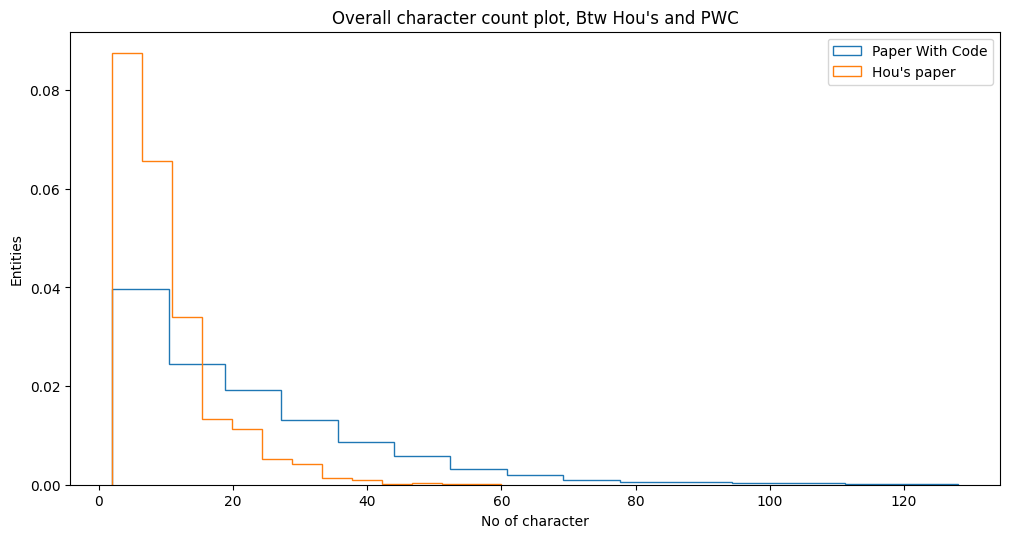

In [ ]:
figure(figsize=(12, 6), dpi=100)
# plt.hist([pwc_count_char,hou_count_char],
#       #  bins=10, 
#       range=(1,100),  
#        histtype= 'step', density=True)

bins1 = math.ceil(math.log2(len(pwc_count_char)) + 1)
bins2 = math.ceil(math.log2(len(hou_count_char)) + 1)


plt.hist(pwc_count_char, bins=bins1,  histtype= 'step',label='Paper With Code', density=True)
plt.hist(hou_count_char, bins=bins2, histtype= 'step', label="Hou's paper", density =True)

#F test 
f_statistic, p_value = f_oneway(pwc_count_char, hou_count_char)

if p_value < 0.05:
    print("The variance between the two datasets is significantly different (p-value =", p_value, ")")
else:
    print("The variance between the two datasets is not significantly different (p-value =", p_value, ")")

print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

hist1, _  = np.histogram(pwc_count_char, bins=bins2, density=True)
hist2, _ = np.histogram(hou_count_char, bins=bins2, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)

plt.xlabel('No of character')
plt.ylabel('Entities')

plt.title("Overall character count plot, Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"])
plt.show()

Bin size of pwc is 12 and hou's is 15
TVD = 0.31779566286608535
KL divergence: 0.4764037865696688


<ipython-input-51-95ef96dbd3bc>:26: RuntimeWarning: divide by zero encountered in log
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
<ipython-input-51-95ef96dbd3bc>:26: RuntimeWarning: invalid value encountered in multiply
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))


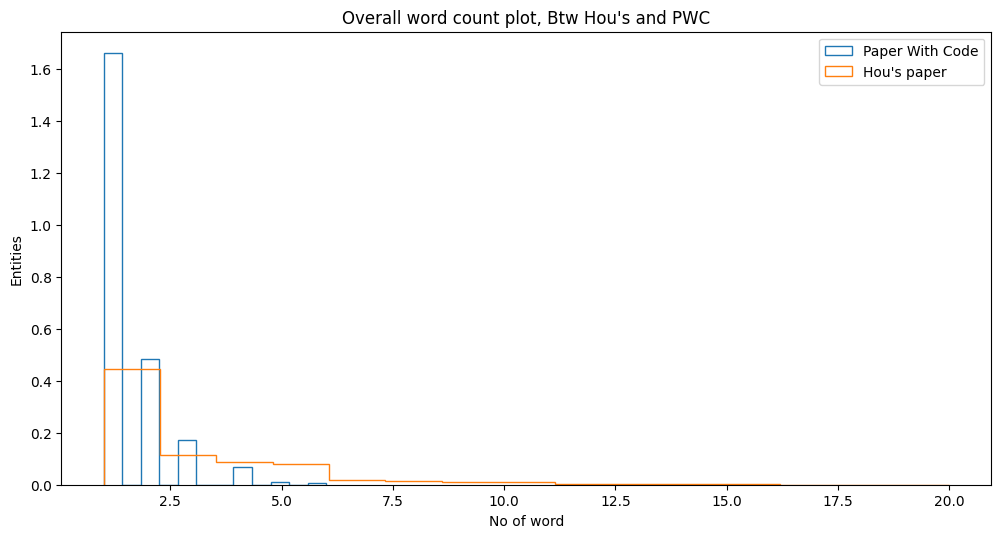

In [ ]:
figure(figsize=(12, 6), dpi=100)
# plt.hist([hou_count_word,pwc_count_word],
#           # bins=10, range=(1,20), 
#          histtype= 'step', density=True)

bins1 = math.ceil(math.log2(len(hou_count_word)) + 1)
bins2 = math.ceil(math.log2(len(pwc_count_word)) + 1)


plt.hist(hou_count_word, bins=bins1,  histtype= 'step',label='Paper With Code', density=True)
plt.hist(pwc_count_word, bins=bins2, histtype= 'step', label="Hou's paper", density =True)


print("Bin size of pwc is {} and hou's is {}".format(bins1, bins2))

hist1, _  = np.histogram(hou_count_word, bins=bins2, density=True)
hist2, _ = np.histogram(pwc_count_word, bins=bins2, density=True)

p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

#Total variation distance (TVD)
tvd = 0.5 * np.sum(np.abs(p1 - p2))
print("TVD =", tvd)

kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print('KL divergence:', kl_divergence)

plt.xlabel('No of word')
plt.ylabel('Entities')

plt.title("Overall word count plot, Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"])
plt.show()


#Testing code's

[8.70918318e-02 1.67193335e-01 6.07105238e-02 1.24964091e-02
 4.26122762e-03 8.61821316e-04 2.39394810e-04 3.83031696e-04
 0.00000000e+00 9.57579240e-05] [0.17016317 0.13325563 0.02641803 0.003108   0.         0.0003885
 0.         0.         0.         0.        ]


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


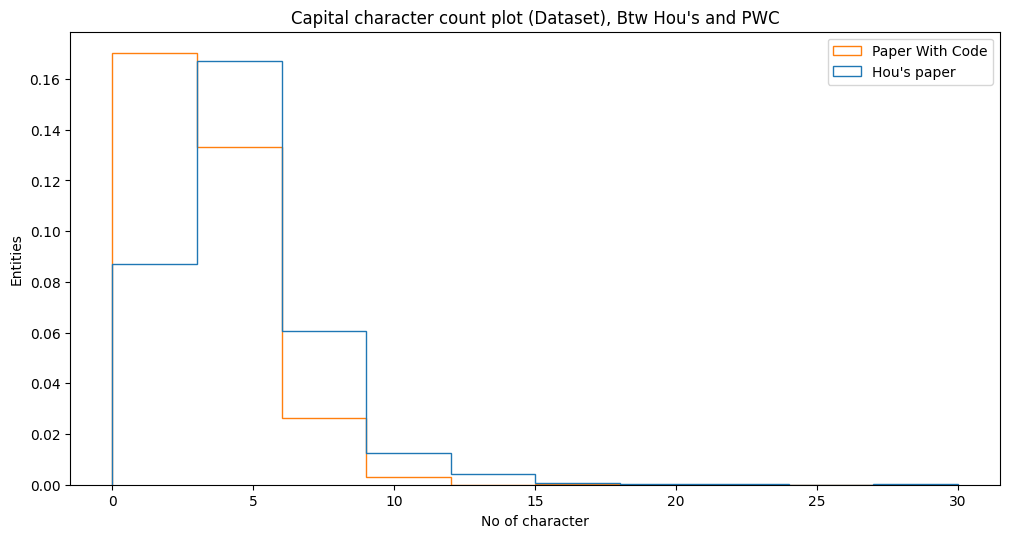

In [ ]:
figure(figsize=(12, 6), dpi=100)
# hist, bins, patches = plt.hist([count_pwc_dataset['Capital'],count_hou_dataset['Capital']],
#           # bins=15,
#            range=(0,30), 
#           histtype= 'step', label= 'pwc Hou', density=True)

print(hist[0], hist[1])
# print(kl_divergence(hist[0], hist[1]))
# print((hist * np.diff(bins)).sum())
# p = hist / np.sum(hist)
# q = hist / np.sum(hist)
# print(p,"xkmxk"q)
# kl_divergence = np.sum(p * np.log(p / q))
# print(kl_divergence, "the Kl is")
# print("hist, bins, patc", hist, bins, patches)
plt.xlabel('No of character')
plt.ylabel('Entities')

plt.title("Capital character count plot (Dataset), Btw Hou's and PWC")
plt.legend(['Paper With Code', "Hou's paper"])


plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Example dataframes with text data
df1 = pd.DataFrame({'text': ['hello world', 'foo bar baz', 'lorem ipsum']})
df2 = pd.DataFrame({'text': ['hello', 'world', 'foo', 'bar']})

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf1 = vectorizer.fit_transform(df1['text'])
tfidf2 = vectorizer.transform(df2['text'])

# Compute cosine similarity matrix
cos_sim = cosine_similarity(tfidf1, tfidf2)

# Print results
print(cos_sim)


[[0.70710678 0.70710678 0.         0.        ]
 [0.         0.         0.57735027 0.57735027]
 [0.         0.         0.         0.        ]]


In [ ]:
from sklearn.metrics import jaccard_score
import pandas as pd

# create sample dataframe
df = pd.DataFrame({
    'col1': ['a', 'b', 'c', 'd', 'e'],
    'col2': ['a', 'b', 'c', 'f', 'g'],
    'col3': ['b', 'd', 'f', 'h', 'i']
})

# loop through all pairs of rows and calculate Jaccard similarity
for i in range(len(df)):
    for j in range(i+1, len(df)):
      similarity = jaccard_score(df.iloc[i], df.iloc[j])
      print(f"Jaccard similarity between row {i} and row {j}: {similarity}")


ValueError: ignored

[0.01 0.02 0.   0.   0.02 0.04 0.07 0.11 0.13 0.08 0.12 0.06 0.07 0.04
 0.08 0.04 0.04 0.02 0.03 0.02] [0.02 0.01 0.01 0.03 0.02 0.03 0.1  0.07 0.12 0.09 0.09 0.09 0.1  0.08
 0.05 0.05 0.03 0.   0.   0.01]
KL divergence: nan


<ipython-input-75-6b4e06cb17a1>:21: RuntimeWarning: divide by zero encountered in true_divide
  kl_divergence = np.sum(p * np.log(p / q))
<ipython-input-75-6b4e06cb17a1>:21: RuntimeWarning: divide by zero encountered in log
  kl_divergence = np.sum(p * np.log(p / q))
<ipython-input-75-6b4e06cb17a1>:21: RuntimeWarning: invalid value encountered in multiply
  kl_divergence = np.sum(p * np.log(p / q))


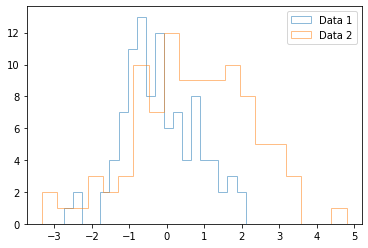

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=0.5, scale=1.5, size=100)

# Plot the histograms
n_bins = 20
plt.hist(data1, bins=n_bins, alpha=0.5,  histtype= 'step',label='Data 1')
plt.hist(data2, bins=n_bins, alpha=0.5, histtype= 'step', label='Data 2')
plt.legend(loc='upper right')
# plt.show()

# Calculate the KL divergence
bin_counts1, bin_edges1 = np.histogram(data1, bins=n_bins, density=True)
bin_counts2, bin_edges2 = np.histogram(data2, bins=n_bins, density=True)
p = bin_counts1 / np.sum(bin_counts1)
q = bin_counts2 / np.sum(bin_counts2)
print(p, q)
kl_divergence = np.sum(p * np.log(p / q))

print('KL divergence:', kl_divergence)


In [ ]:
def kl_divergence(p, q):
    # print(p,q)
    # print(np.sum(np.where(p != 0, 0)))
    # print(len(p), len(q))
    # print(np.sum(np.where(p != 0, p * np.log(p / q), 0)))
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
count_pwc_dataset['Capital'].value_counts(bins= 15, normalize=True)

(-0.064, 4.2]    0.631549
(4.2, 8.4]       0.312760
(8.4, 12.6]      0.043921
(12.6, 16.8]     0.008325
(16.8, 21.0]     0.002153
(21.0, 25.2]     0.000287
(25.2, 29.4]     0.000287
(58.8, 63.0]     0.000287
(29.4, 33.6]     0.000144
(33.6, 37.8]     0.000144
(42.0, 46.2]     0.000144
(37.8, 42.0]     0.000000
(46.2, 50.4]     0.000000
(50.4, 54.6]     0.000000
(54.6, 58.8]     0.000000
Name: Capital, dtype: float64

In [ ]:
count_hou_dataset['Capital'].value_counts(bins= 15, normalize=True)

(-0.018000000000000002, 1.133]    0.305361
(1.133, 2.267]                    0.205128
(2.267, 3.4]                      0.175991
(3.4, 4.533]                      0.129371
(4.533, 5.667]                    0.094406
(5.667, 6.8]                      0.046620
(6.8, 7.933]                      0.023310
(7.933, 9.067]                    0.017483
(9.067, 10.2]                     0.001166
(15.867, 17.0]                    0.001166
(10.2, 11.333]                    0.000000
(11.333, 12.467]                  0.000000
(12.467, 13.6]                    0.000000
(13.6, 14.733]                    0.000000
(14.733, 15.867]                  0.000000
Name: Capital, dtype: float64

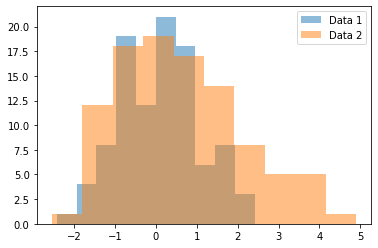

[0.02062883 0.08251533 0.16503066 0.39194782 0.24754599 0.43320548
 0.37131898 0.12377299 0.16503066 0.0618865 ] [0.0134285  0.16114205 0.24171308 0.25514158 0.22828457 0.18799906
 0.10742803 0.06714252 0.06714252 0.0134285 ]
KL divergence: 0.1619973518727764


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=0.5, scale=1.5, size=100)

# Plot the histograms
n_bins = 10
plt.hist(data1, bins=n_bins, alpha=0.5, label='Data 1')
plt.hist(data2, bins=n_bins, alpha=0.5, label='Data 2')
plt.legend(loc='upper right')
plt.show()

# Calculate the KL divergence
bin_counts1, bin_edges1 = np.histogram(data1, bins=n_bins, density=True)
bin_counts2, bin_edges2 = np.histogram(data2, bins=n_bins, density=True)
p = bin_counts1 / np.sum(bin_counts1)
q = bin_counts2 / np.sum(bin_counts2)
kl_divergence = np.sum(p * np.log(p / q))
print(bin_counts1, bin_counts2)
print('KL divergence:', kl_divergence)



[ 0.94412442 -0.89857622 -0.38372551 ...  0.55598775 -1.16477705
 -0.42476055]
18 18
[1.2000e+01 5.1000e+01 1.8900e+02 8.0000e+02 2.2430e+03 5.1980e+03
 9.4780e+03 1.4571e+04 1.7732e+04 1.7685e+04 1.4235e+04 9.4320e+03
 5.1150e+03 2.2030e+03 7.5800e+02 2.3400e+02 5.9000e+01 5.0000e+00]
[0.44444444 0.         0.11111111 0.         0.         0.11111111
 0.         0.         0.         0.11111111 0.         0.
 0.         0.         0.11111111 0.         0.         0.11111111] [1.2000e-04 5.1000e-04 1.8900e-03 8.0000e-03 2.2430e-02 5.1980e-02
 9.4780e-02 1.4571e-01 1.7732e-01 1.7685e-01 1.4235e-01 9.4320e-02
 5.1150e-02 2.2030e-02 7.5800e-03 2.3400e-03 5.9000e-04 5.0000e-05]
KL divergence: nan


<ipython-input-115-9bdb84214fef>:22: RuntimeWarning: divide by zero encountered in log
  kl_divergence = np.sum(p * np.log(p / q))
<ipython-input-115-9bdb84214fef>:22: RuntimeWarning: invalid value encountered in multiply
  kl_divergence = np.sum(p * np.log(p / q))


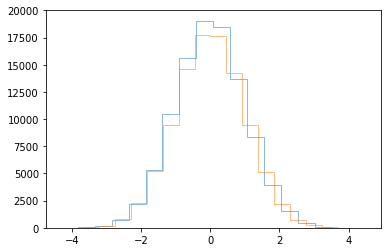

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate some sample data
data1 = np.random.normal(size=100000)
data2 = np.random.normal(size=100000)
print(data1)
# Calculate the number of bins using Sturges' Rule
bins1 = math.ceil(math.log2(len(data1)) + 1)
bins2 = math.ceil(math.log2(len(data2)) + 1)
print(bins1, bins2)
# Plot the histogram
n, bins, patches = plt.hist(data1, bins=bins1, alpha=0.5,histtype= 'step')
n, bins, patches = plt.hist(data2, bins=bins2, alpha=0.5, histtype= 'step')
print(n)
bin_counts1, bin_edges1 = np.histogram(data1, bins1, density=True)
bin_counts2, bin_edges2 = np.histogram(data2, bins2, density=True)
p = bin_counts1 / np.sum(bin_counts1)
q = bin_counts2 / np.sum(bin_counts2)
print(p, q)
kl_divergence = np.sum(p * np.log(p / q))

print('KL divergence:', kl_divergence)
# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate some sample data
df1 = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(100, 1)), columns=["data1"])
df2 = pd.DataFrame(np.random.normal(loc=5, scale=2, size=(200, 1)), columns=["data2"])
print(df1, df2)
bins1 = math.ceil(math.log2(len(df1)) + 1)
bins2 = math.ceil(math.log2(len(df2)) + 1)
print(bins1, bins2)
# Calculate the histograms for each dataframe
hist1, bins1 = np.histogram(df1["data1"], bins=bins1)
hist2, bins2 = np.histogram(df2["data2"], bins=bins2)

# Normalize the histograms to convert them into probability distributions
p = hist1 / hist1.sum()
q = hist2 / hist2.sum()
print(p1)
# Calculate the KL divergence
# kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
kl_divergence = np.sum(p * np.log(p / q))

print("KL divergence:", kl_divergence)



In [ ]:
import pandas as pd
import numpy as np

# Generate some sample data
df1 = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(100, 1)), columns=["data1"])
df2 = pd.DataFrame(np.random.normal(loc=5, scale=2, size=(100, 1)), columns=["data2"])

# Calculate the histograms for each dataframe
hist1, bins1 = np.histogram(df1["data1"], bins=20)
hist2, bins2 = np.histogram(df2["data2"], bins=20)

# Normalize the histograms to convert them into probability distributions
p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()
print(p1)
# Calculate the KL divergence
kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

print("KL divergence:", kl_divergence)



[0.01 0.02 0.01 0.06 0.04 0.07 0.05 0.07 0.09 0.07 0.12 0.1  0.03 0.07
 0.03 0.1  0.01 0.01 0.02 0.02]
KL divergence: inf


<ipython-input-127-1c720c0f272d>:17: RuntimeWarning: divide by zero encountered in true_divide
  kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Generate some sample data
df1 = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(100, 1)), columns=["data1"])
df2 = pd.DataFrame(np.random.normal(loc=5, scale=2, size=(100, 1)), columns=["data2"])

# Calculate the histograms for each dataframe
hist1, bins1 = np.histogram(df1["data1"], bins=20)
hist2, bins2 = np.histogram(df2["data2"], bins=30)

# Align the bins by using linear interpolation
bin_edges = np.linspace(min(bins1[0], bins2[0]), max(bins1[-1], bins2[-1]), max(len(bins1), len(bins2)))

# Re-bin each histogram using the common bin edges
hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
# Normalize the histograms to convert them into probability distributions
p1 = hist1 / hist1.sum()
p2 = hist2 / hist2.sum()

# Calculate the KL divergence
# kl_divergence = np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))
kl_divergence = np.sum(p1 * np.log(p1 / p2))


print("KL divergence:", kl_divergence)

KL divergence: nan


<ipython-input-161-becfa0578c81>:24: RuntimeWarning: divide by zero encountered in true_divide
  kl_divergence = np.sum(p1 * np.log(p1 / p2))
<ipython-input-161-becfa0578c81>:24: RuntimeWarning: divide by zero encountered in log
  kl_divergence = np.sum(p1 * np.log(p1 / p2))
<ipython-input-161-becfa0578c81>:24: RuntimeWarning: invalid value encountered in multiply
  kl_divergence = np.sum(p1 * np.log(p1 / p2))


In [ ]:
p = binned_data1 / np.sum(binned_data1)
q = binned_data2 / np.sum(binned_data2)
kl_divergence = np.sum(p * np.log(p / q))

In [ ]:
def kl_divergence(p, q):
    print(p,q)
    print(np.sum(np.where(p != 0, 0)))
    print(len(p), len(q))
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
kl_divergence(count_pwc_dataset['word'],count_hou_dataset['word'])

In [ ]:
count_pwc_dataset['word'].describe()

count    6967.000000
mean        2.989378
std         2.627818
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: word, dtype: float64

In [ ]:
kl_divergence(count_pwc_dataset['word'],count_hou_dataset['word'])

In [ ]:
fig = px.histogram(count_hou_method, x=[count_hou_method['character']])
fig.show()

In [ ]:
fig = px.histogram(count_pwc_method, x=[count_pwc_method['character']])
fig.show()

In [ ]:
fig = px.histogram(count_hou_method, x=[count_hou_method['word']])
fig.show()

In [ ]:
fig = px.histogram(count_pwc_method, x=[count_pwc_method['word']])
fig.show()

In [ ]:
fig = px.histogram(count_hou_dataset, x=[count_hou_dataset['character']])
fig.show()

In [ ]:
fig = px.histogram(count_pwc_dataset, x=[count_pwc_dataset['character']])
fig.show()

In [ ]:
fig = px.histogram(count_hou_dataset, x=[count_hou_dataset['word']])
fig.show()

In [ ]:
fig = px.histogram(count_pwc_dataset, x=[count_pwc_dataset['word']])
fig.show()

In [ ]:
data

array([-0.66447792,  1.80091538,  0.11811408,  0.96963524,  0.22958462,
       -0.75722908, -0.79449749,  0.70304499, -0.2340211 , -0.54796623,
        0.27060109, -0.52930749, -1.87750667, -2.01266775, -0.63025431,
        1.0701983 ,  0.43280327,  0.10953121,  0.66126564, -0.11323625,
       -0.75547295, -0.93567999,  0.35826418,  0.68493916,  1.22726716,
       -1.52055775,  0.05609221,  0.19661914,  1.47774629,  0.33724275,
       -2.51279163, -0.37012763,  0.6363944 , -1.19432207, -0.28215815,
        0.40523267, -0.84478968,  0.37821396,  0.09700866,  0.53871834,
       -0.01360982,  0.0973161 , -0.6670291 , -0.29391473, -0.07228778,
        0.3902934 ,  1.38762485, -0.10865201,  1.65875226, -0.24272807,
        0.55236665,  0.91927044,  0.46372136,  0.88303906,  0.68083048,
       -0.21101565, -0.45189948,  0.17475444,  0.59009829, -0.59681754,
       -0.99634811,  0.35100507,  2.78703499,  0.80825055,  0.95158423,
       -0.35799816,  0.17970101,  0.05031779, -1.59191921, -0.36

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


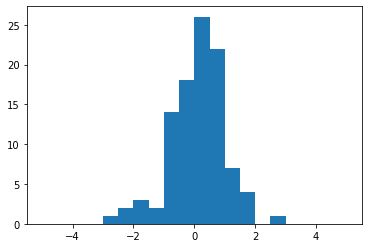

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.random.normal(loc=0, scale=1, size=(100,))

# Define custom bin edges
bin_edges = np.linspace(-5, 5, 21)
print(bin_edges)
# Create a histogram with custom bin edges
plt.hist(data, bins=bin_edges)

# Show the histogram
plt.show()
